# Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import gc

trn = pd.read_csv('./input/train_ver2.csv')

/home/kerrykim/anaconda3/envs/cuda_python_3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,8,11,15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Data flow check

In [3]:
trn.shape

(13647309, 48)

In [4]:
trn.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [5]:
# head를 사용하면 몇 개의 col은 생략되어 나온다.
# 이 구문을 실행시켜 값을 확인해보면 각 column의 data type을 확인할 수 있다. 
# 특히 age 같은 경우는 object로 되어 있어서 전처리 과정으로 정수값으로의 변환이 필요하다.
# renta 같은 경우 가구의 총 수입을 의미하는데 결측치가 존재하므로 전처리가 필요하다.

for col in trn.columns:
    print('{}\n'.format(trn[col].head()))

0    2015-01-28
1    2015-01-28
2    2015-01-28
3    2015-01-28
4    2015-01-28
Name: fecha_dato, dtype: object

0    1375586
1    1050611
2    1050612
3    1050613
4    1050614
Name: ncodpers, dtype: int64

0    N
1    N
2    N
3    N
4    N
Name: ind_empleado, dtype: object

0    ES
1    ES
2    ES
3    ES
4    ES
Name: pais_residencia, dtype: object

0    H
1    V
2    V
3    H
4    V
Name: sexo, dtype: object

0     35
1     23
2     23
3     22
4     23
Name: age, dtype: object

0    2015-01-12
1    2012-08-10
2    2012-08-10
3    2012-08-10
4    2012-08-10
Name: fecha_alta, dtype: object

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: ind_nuevo, dtype: float64

0          6
1         35
2         35
3         35
4         35
Name: antiguedad, dtype: object

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: indrel, dtype: float64

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: ult_fec_cli_1t, dtype: object

0    1
1    1
2    1
3    1
4    1
Name: indrel_1mes, dtype: obje

In [6]:
# 본 교재에선 data type이 object인 경우 범주형 변수, int/float인 경우 수치형 변수라고 지칭하고 있다.
# 수치형 변수는 직접 모델에 넣을 수 있지만 범주형 변수는 마치 one-hot encodling처럼 .factorize() 함수를 이용해야 한다.

trn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13647309 entries, 0 to 13647308
Data columns (total 48 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   fecha_dato             object 
 1   ncodpers               int64  
 2   ind_empleado           object 
 3   pais_residencia        object 
 4   sexo                   object 
 5   age                    object 
 6   fecha_alta             object 
 7   ind_nuevo              float64
 8   antiguedad             object 
 9   indrel                 float64
 10  ult_fec_cli_1t         object 
 11  indrel_1mes            object 
 12  tiprel_1mes            object 
 13  indresi                object 
 14  indext                 object 
 15  conyuemp               object 
 16  canal_entrada          object 
 17  indfall                object 
 18  tipodom                float64
 19  cod_prov               float64
 20  nomprov                object 
 21  ind_actividad_cliente  float64
 22  renta           

In [7]:
# 데이터는 총 24개의 고객 관련 변수(#1~24)와 금융 제품 변수(#25~48)로 이루어져 있다.
# 먼저 24개의 고객 관련 변수, 특히 그 중 int와 float type을 가진 변수들에 더 알아본다.

num_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['int64', 'float64']]
print(num_cols)

trn[num_cols].describe()

# tipodom을 보면 모든 값이 1이므로 학습에 도움되지 않는다.

['ncodpers', 'ind_nuevo', 'indrel', 'tipodom', 'cod_prov', 'ind_actividad_cliente', 'renta']


,ncodpers,ind_nuevo,indrel,tipodom,cod_prov,ind_actividad_cliente,renta
count,1.364731e+07,1.361958e+07,1.361958e+07,13619574.0,1.355372e+07,1.361958e+07,1.085293e+07
mean,8.349042e+05,5.956184e-02,1.178399e+00,1.0,2.657147e+01,4.578105e-01,1.342543e+05
std,4.315650e+05,2.366733e-01,4.177469e+00,0.0,1.278402e+01,4.982169e-01,2.306202e+05
min,1.588900e+04,0.000000e+00,1.000000e+00,1.0,1.000000e+00,0.000000e+00,1.202730e+03
25%,4.528130e+05,0.000000e+00,1.000000e+00,1.0,1.500000e+01,0.000000e+00,6.871098e+04
50%,9.318930e+05,0.000000e+00,1.000000e+00,1.0,2.800000e+01,0.000000e+00,1.018500e+05
75%,1.199286e+06,0.000000e+00,1.000000e+00,1.0,3.500000e+01,1.000000e+00,1.559560e+05
max,1.553689e+06,1.000000e+00,9.900000e+01,1.0,5.200000e+01,1.000000e+00,2.889440e+07


In [ ]:
# columns의 의미

'''
fecha_dato : 날짜
fecha_alta : 고객이 은행과 첫 계약을 한 날자
antiguedad : 은행 거래 누적기간
ult_fec_cli_1t : 1등급 고객으로서 마지막 날짜
'''

'''
ncodpers : 고객 고유식별번호
ind_nuevo : 신규 고객지표 (6개월 이내 신규고객일 경우 1)
indrel : 고객 등급 (1 or 99)
tipodom : 주소 유형 (1: primary address)
cod_prove : 지방코드 (주소 기반)
ind_actividad_cliente : 고객 활발성 지표 (1: 활발함 2: 활발하지 않음)
renta : 가구 총수입
'''

In [8]:
# 이번에는 첫 24개의 고객 변수 중 objet type을 갖는 범주형(categorical) 변수를 확인해본다.

cat_cols = [col for col in trn.columns[:24] if trn[col].dtype in ['O']]
trn[cat_cols].describe()

# 여기서 주의해야 할 것은 나이를 의미하는 'age' 변수가 수치형이 아니라 범주형으로 분류되어 있다는 것이다.
# 그 외, 은행 누적 거래 기간을 나타내는 antiguedada도 수치형으로 분류되어야 한다. 전처리 과정에서 수치형으로 변환해야 한다.

,fecha_dato,ind_empleado,pais_residencia,sexo,age,fecha_alta,antiguedad,ult_fec_cli_1t,indrel_1mes,tiprel_1mes,indresi,indext,conyuemp,canal_entrada,indfall,nomprov,segmento
count,13647309,13619575,13619575,13619505,13647309,13619575,13647309,24793,13497528.0,13497528,13619575,13619575,1808,13461183,13619575,13553718,13457941
unique,17,5,118,2,235,6756,507,223,13.0,5,2,2,2,162,2,52,3
top,2016-05-28,N,ES,V,23,2014-07-28,0,2015-12-24,1.0,I,S,N,N,KHE,N,MADRID,02 - PARTICULARES
freq,931453,13610977,13553710,7424252,542682,57389,134335,763,7277607.0,7304875,13553711,12974839,1791,4055270,13584813,4409600,7960220


In [ ]:
# describe()의 row의 의미
'''
unique :  해당 범주형 변수의 고유값 개수. sexo의 경우 2개만 존재한다.
top : 가장 빈도가 높은 데이터가 표시된다.
freq : top에서 표시된 최빈 데이터의 빈도수를 의미한다.
'''

In [8]:
# np.unique를 통해 각 col의 고유값을 출력할 수 있다.

for col in cat_cols:
    uniq = np.unique(trn[col].astype(str))
    print('-' * 50)
    print('# col {}, n_uniq{}, uniq{}'.format(col, len(uniq), uniq))

--------------------------------------------------
# col fecha_dato, n_uniq17, uniq['2015-01-28' '2015-02-28' '2015-03-28' '2015-04-28' '2015-05-28'
 '2015-06-28' '2015-07-28' '2015-08-28' '2015-09-28' '2015-10-28'
 '2015-11-28' '2015-12-28' '2016-01-28' '2016-02-28' '2016-03-28'
 '2016-04-28' '2016-05-28']
--------------------------------------------------
# col ind_empleado, n_uniq6, uniq['A' 'B' 'F' 'N' 'S' 'nan']
--------------------------------------------------
# col pais_residencia, n_uniq119, uniq['AD' 'AE' 'AL' 'AO' 'AR' 'AT' 'AU' 'BA' 'BE' 'BG' 'BM' 'BO' 'BR' 'BY'
 'BZ' 'CA' 'CD' 'CF' 'CG' 'CH' 'CI' 'CL' 'CM' 'CN' 'CO' 'CR' 'CU' 'CZ'
 'DE' 'DJ' 'DK' 'DO' 'DZ' 'EC' 'EE' 'EG' 'ES' 'ET' 'FI' 'FR' 'GA' 'GB'
 'GE' 'GH' 'GI' 'GM' 'GN' 'GQ' 'GR' 'GT' 'GW' 'HK' 'HN' 'HR' 'HU' 'IE'
 'IL' 'IN' 'IS' 'IT' 'JM' 'JP' 'KE' 'KH' 'KR' 'KW' 'KZ' 'LB' 'LT' 'LU'
 'LV' 'LY' 'MA' 'MD' 'MK' 'ML' 'MM' 'MR' 'MT' 'MX' 'MZ' 'NG' 'NI' 'NL'
 'NO' 'NZ' 'OM' 'PA' 'PE' 'PH' 'PK' 'PL' 'PR' 'PT' 'PY' 'QA' 'RO

--------------------------------------------------
# col indrel_1mes, n_uniq10, uniq['1' '1.0' '2' '2.0' '3' '3.0' '4' '4.0' 'P' 'nan']
--------------------------------------------------
# col tiprel_1mes, n_uniq6, uniq['A' 'I' 'N' 'P' 'R' 'nan']
--------------------------------------------------
# col indresi, n_uniq3, uniq['N' 'S' 'nan']
--------------------------------------------------
# col indext, n_uniq3, uniq['N' 'S' 'nan']
--------------------------------------------------
# col conyuemp, n_uniq3, uniq['N' 'S' 'nan']
--------------------------------------------------
# col canal_entrada, n_uniq163, uniq['004' '007' '013' '025' 'K00' 'KAA' 'KAB' 'KAC' 'KAD' 'KAE' 'KAF' 'KAG'
 'KAH' 'KAI' 'KAJ' 'KAK' 'KAL' 'KAM' 'KAN' 'KAO' 'KAP' 'KAQ' 'KAR' 'KAS'
 'KAT' 'KAU' 'KAV' 'KAW' 'KAY' 'KAZ' 'KBB' 'KBD' 'KBE' 'KBF' 'KBG' 'KBH'
 'KBJ' 'KBL' 'KBM' 'KBN' 'KBO' 'KBP' 'KBQ' 'KBR' 'KBS' 'KBU' 'KBV' 'KBW'
 'KBX' 'KBY' 'KBZ' 'KCA' 'KCB' 'KCC' 'KCD' 'KCE' 'KCF' 'KCG' 'KCH' 'KCI'
 'KCJ' 'KCK' 'KC

## Data visualization

In [5]:
import matplotlib
import matplotlib.pyplot as plt
# Jupyter Notebook 내부에 그래프를 출력하도록 설정
%matplotlib inline
import seaborn as sns

--------------------------------------------------
col :  fecha_dato


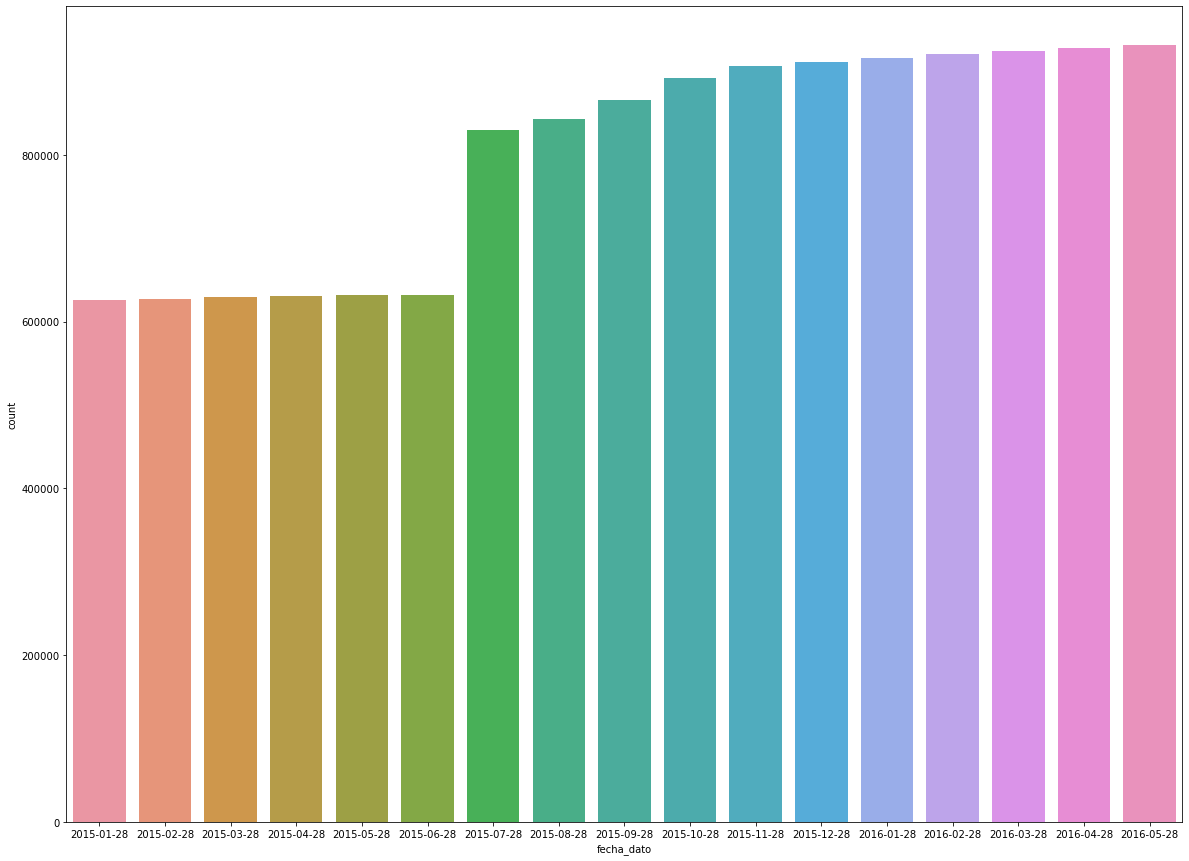

--------------------------------------------------
col :  ind_empleado


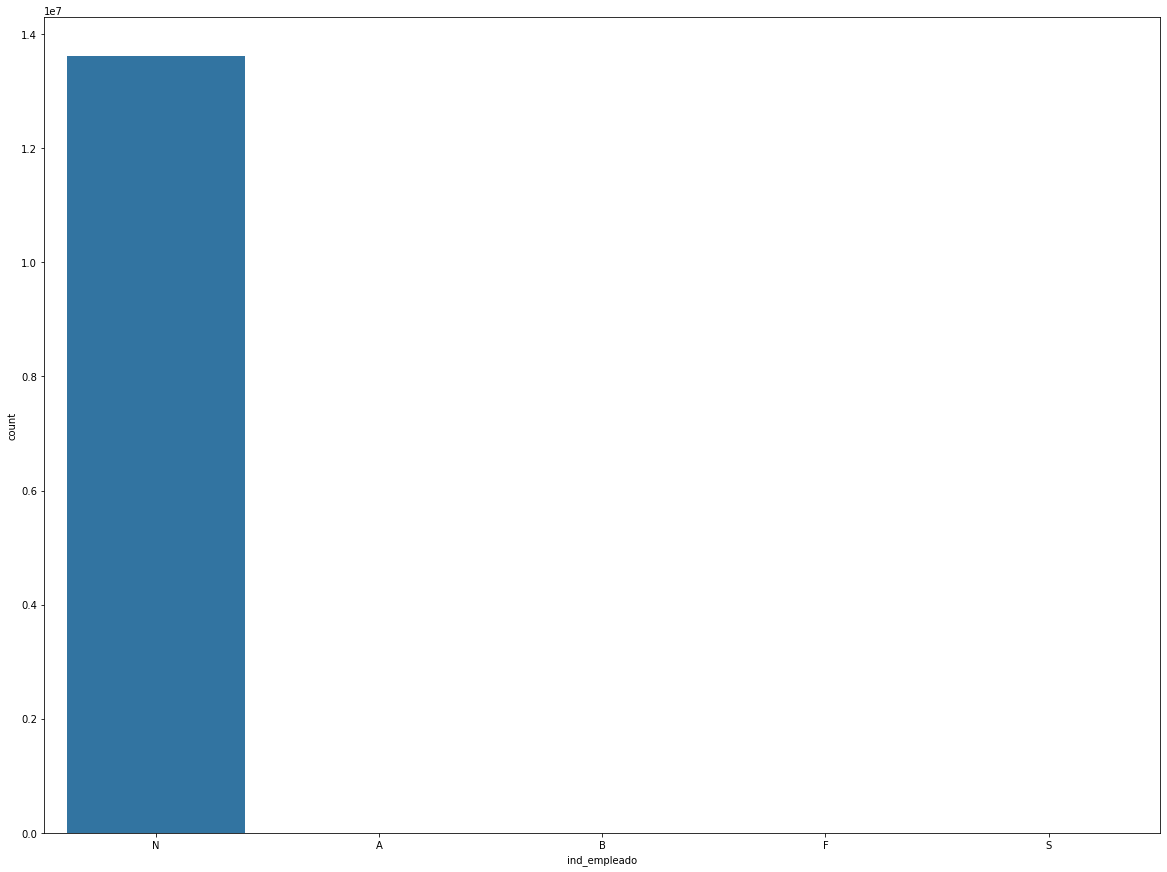

--------------------------------------------------
col :  pais_residencia


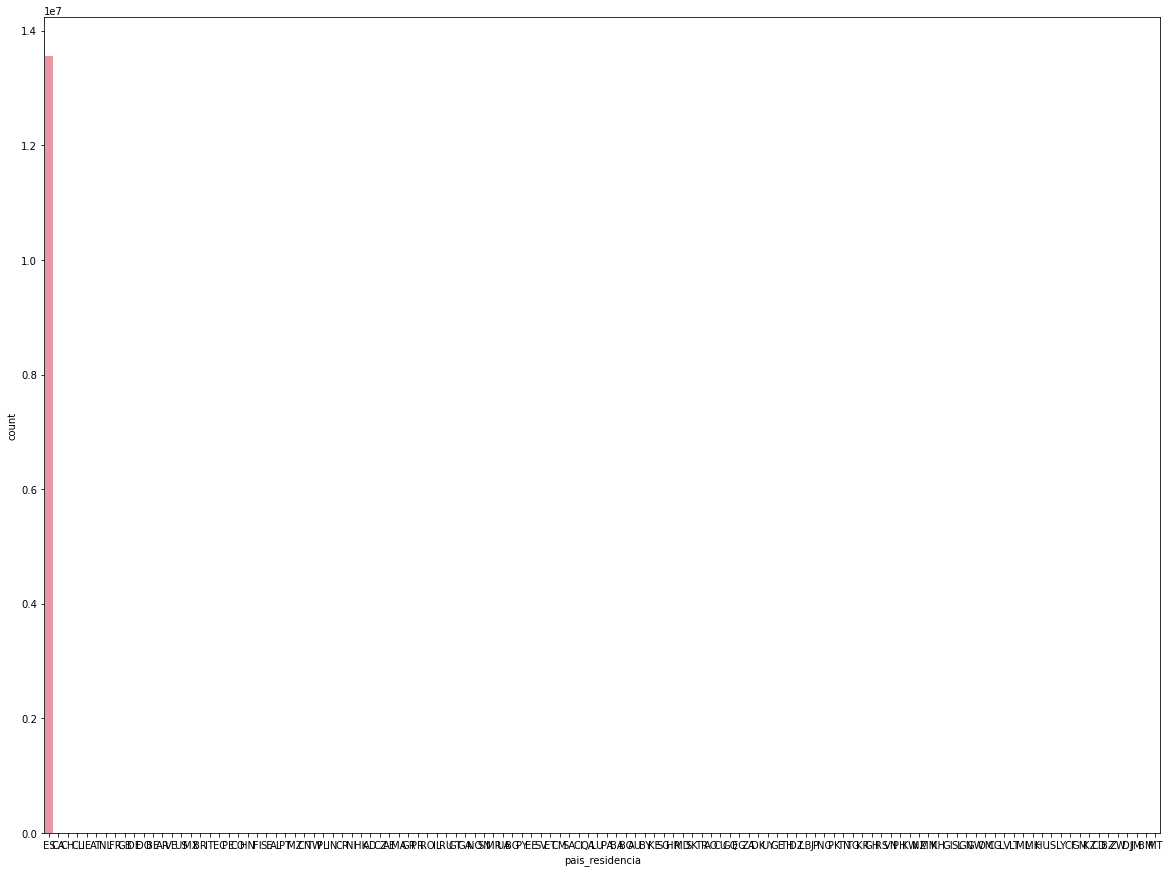

--------------------------------------------------
col :  sexo


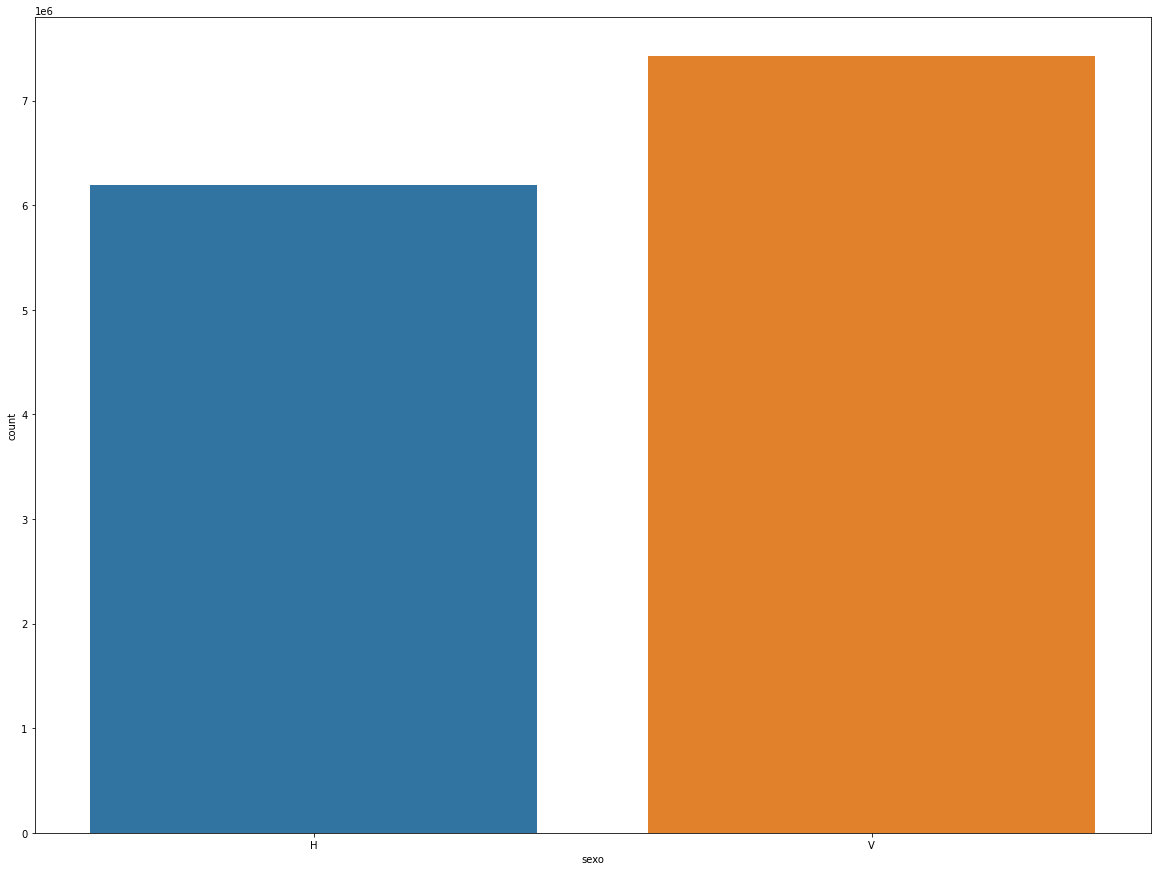

--------------------------------------------------
col :  age


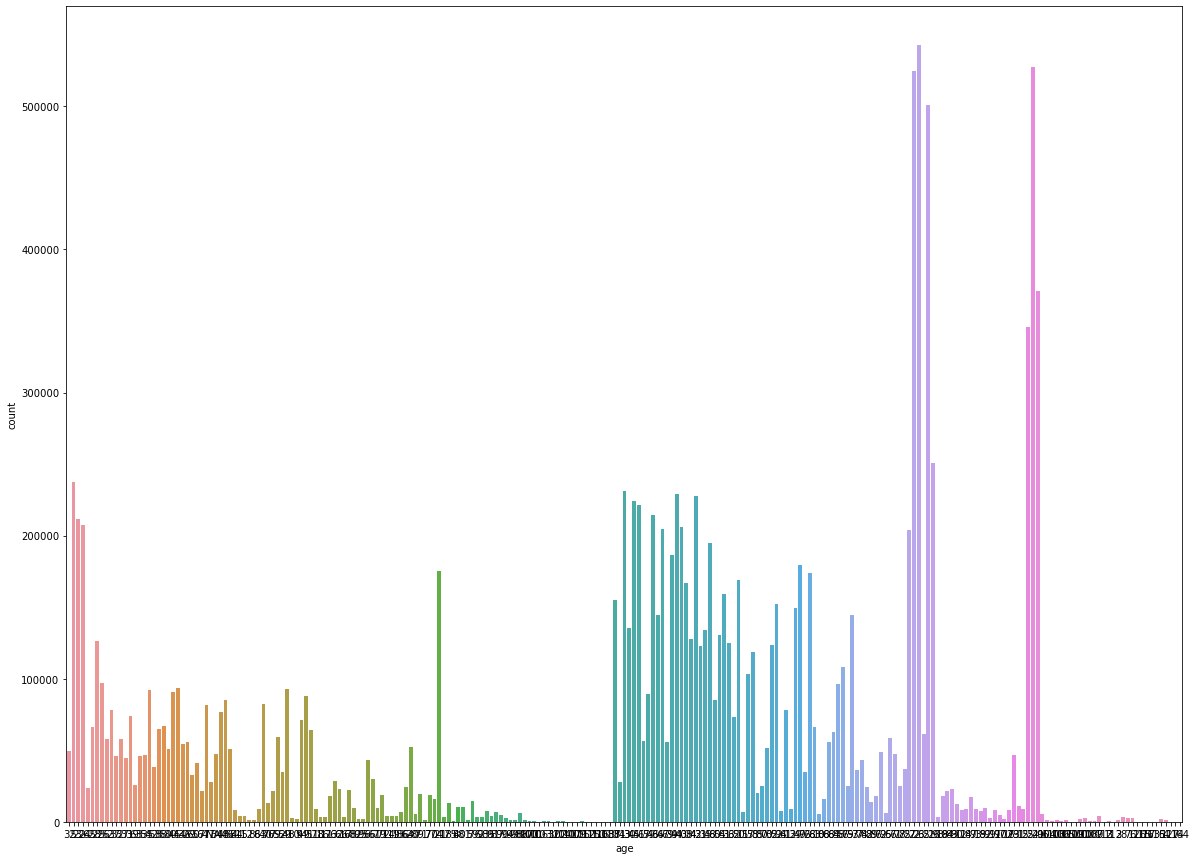

--------------------------------------------------
col :  fecha_alta


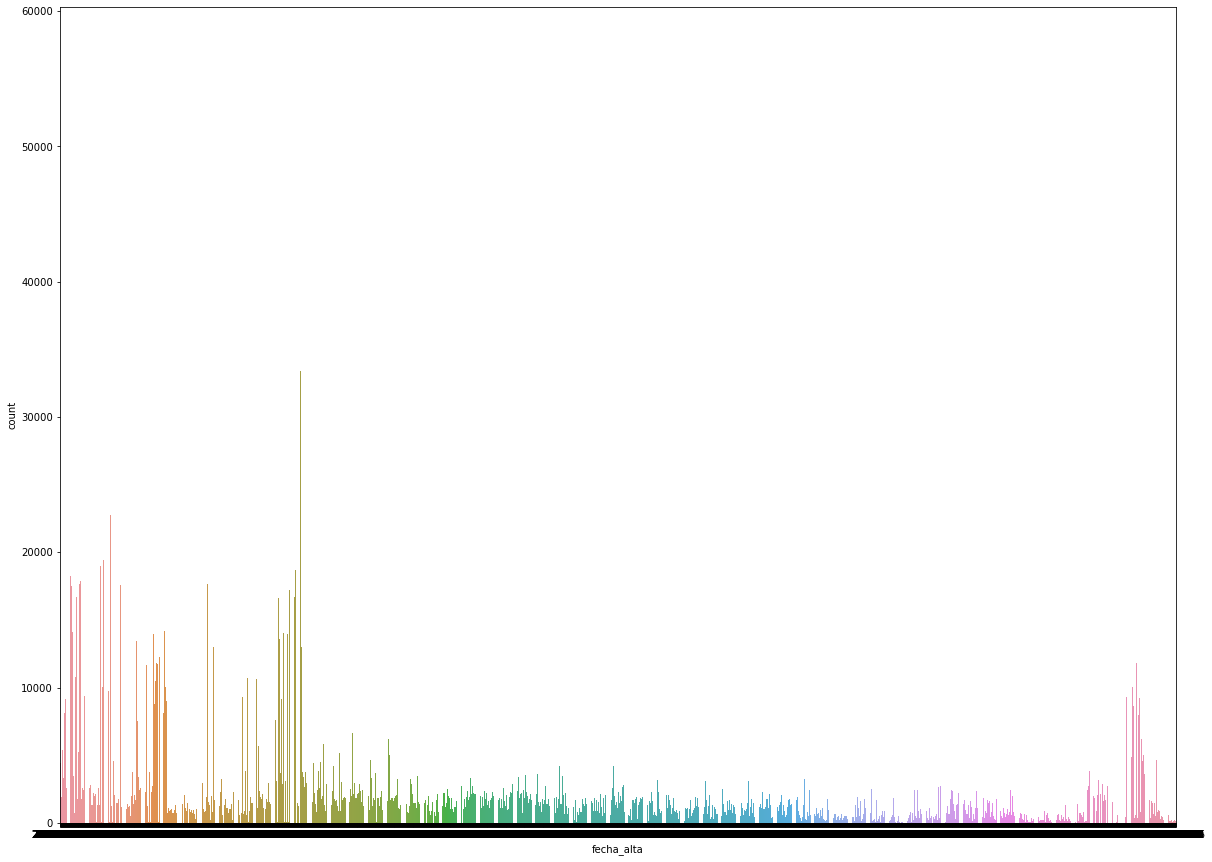

--------------------------------------------------
col :  ind_nuevo


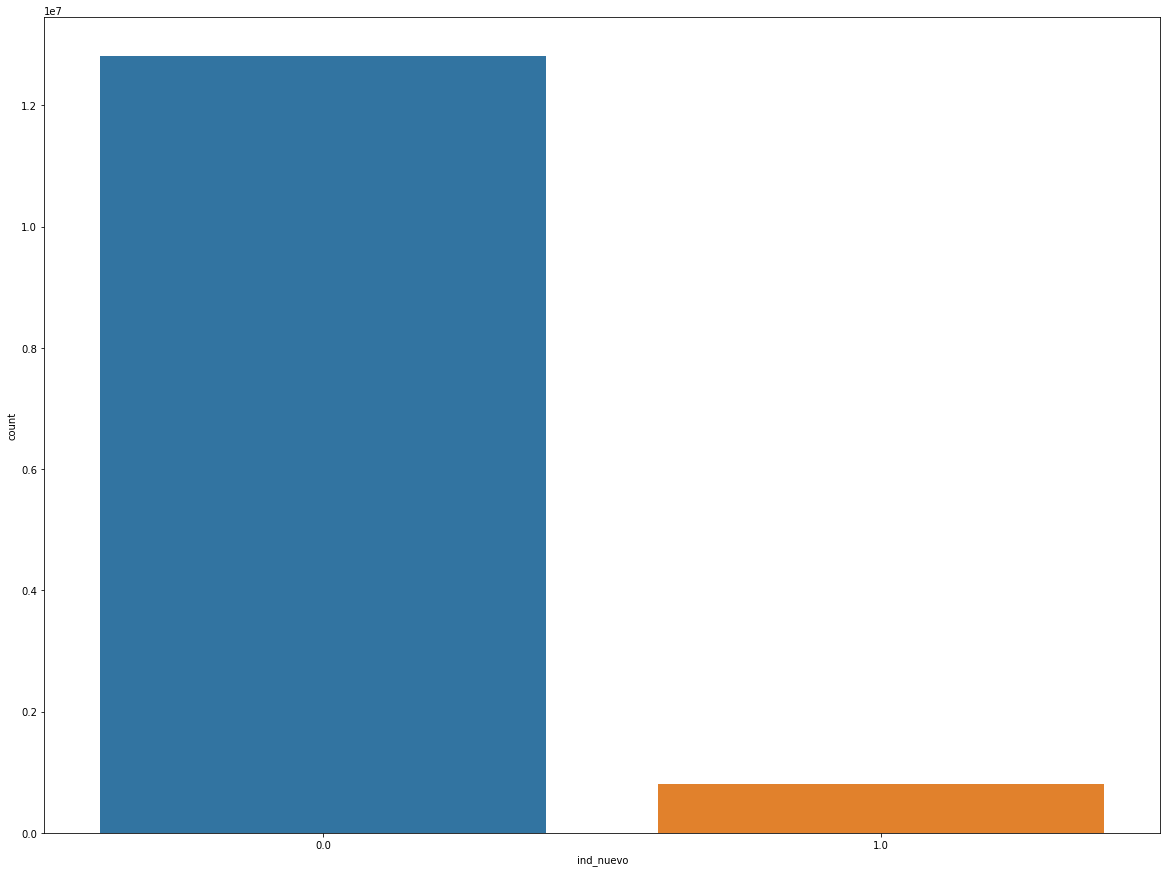

--------------------------------------------------
col :  antiguedad


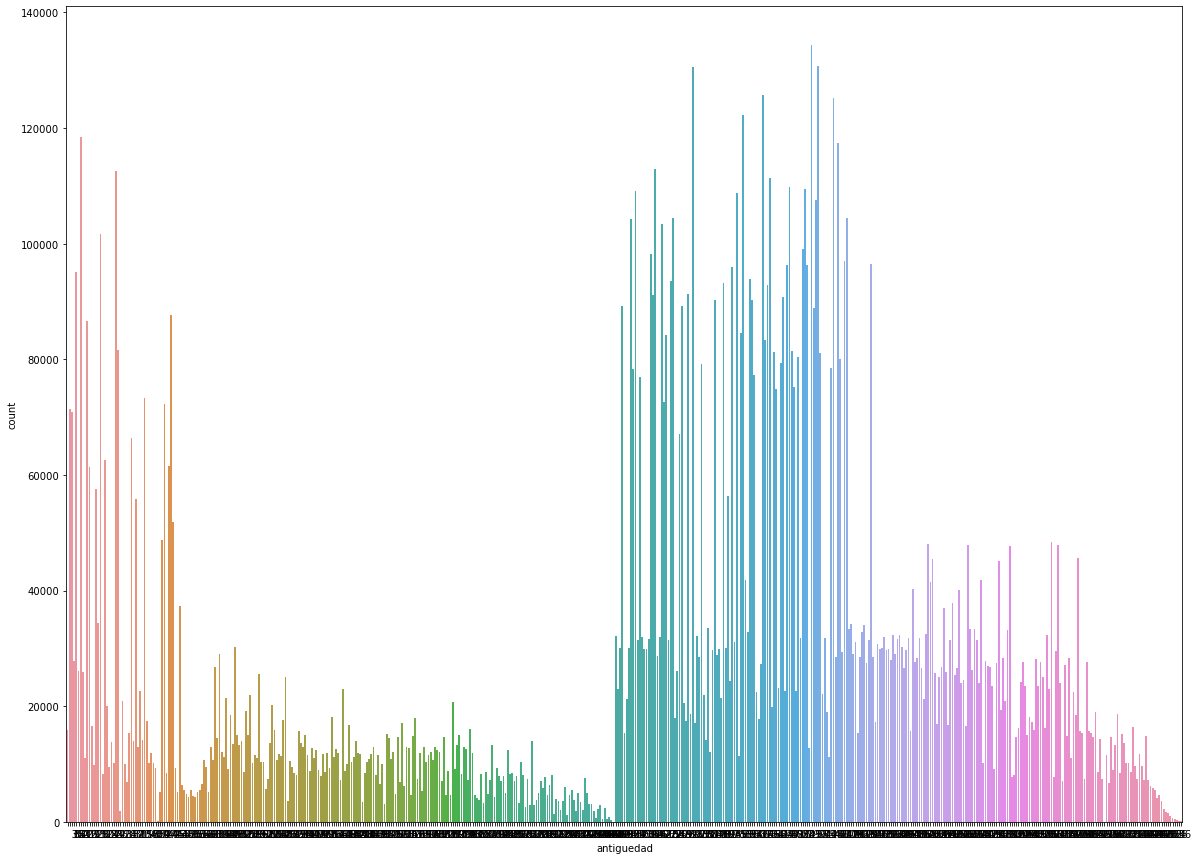

--------------------------------------------------
col :  indrel


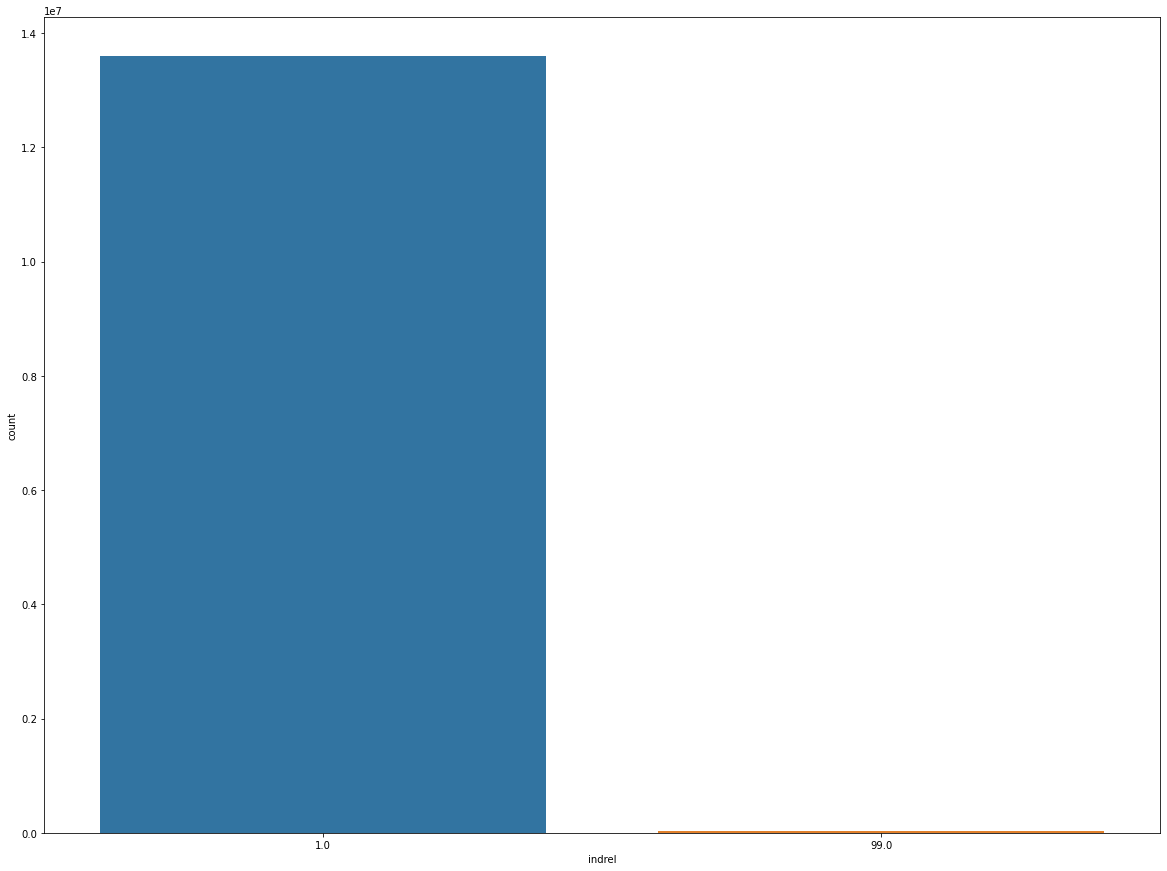

--------------------------------------------------
col :  ult_fec_cli_1t


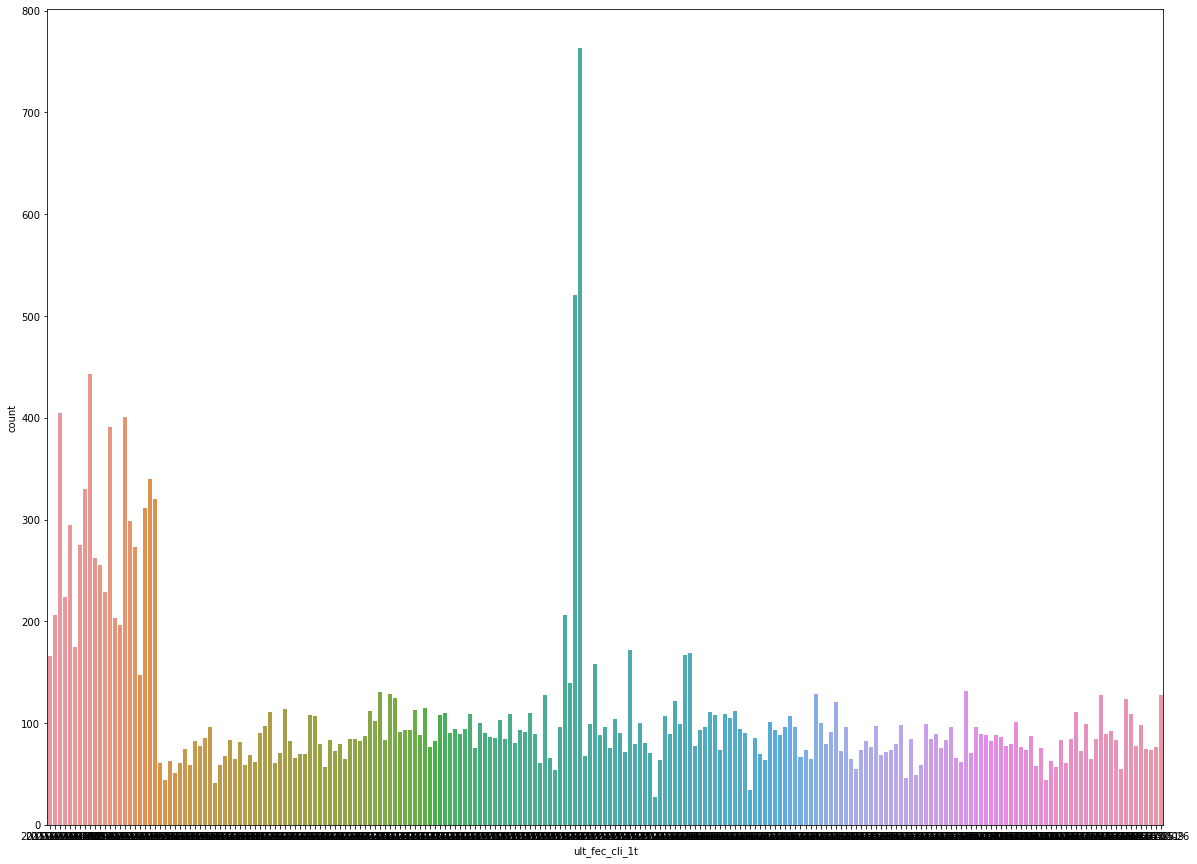

--------------------------------------------------
col :  indrel_1mes


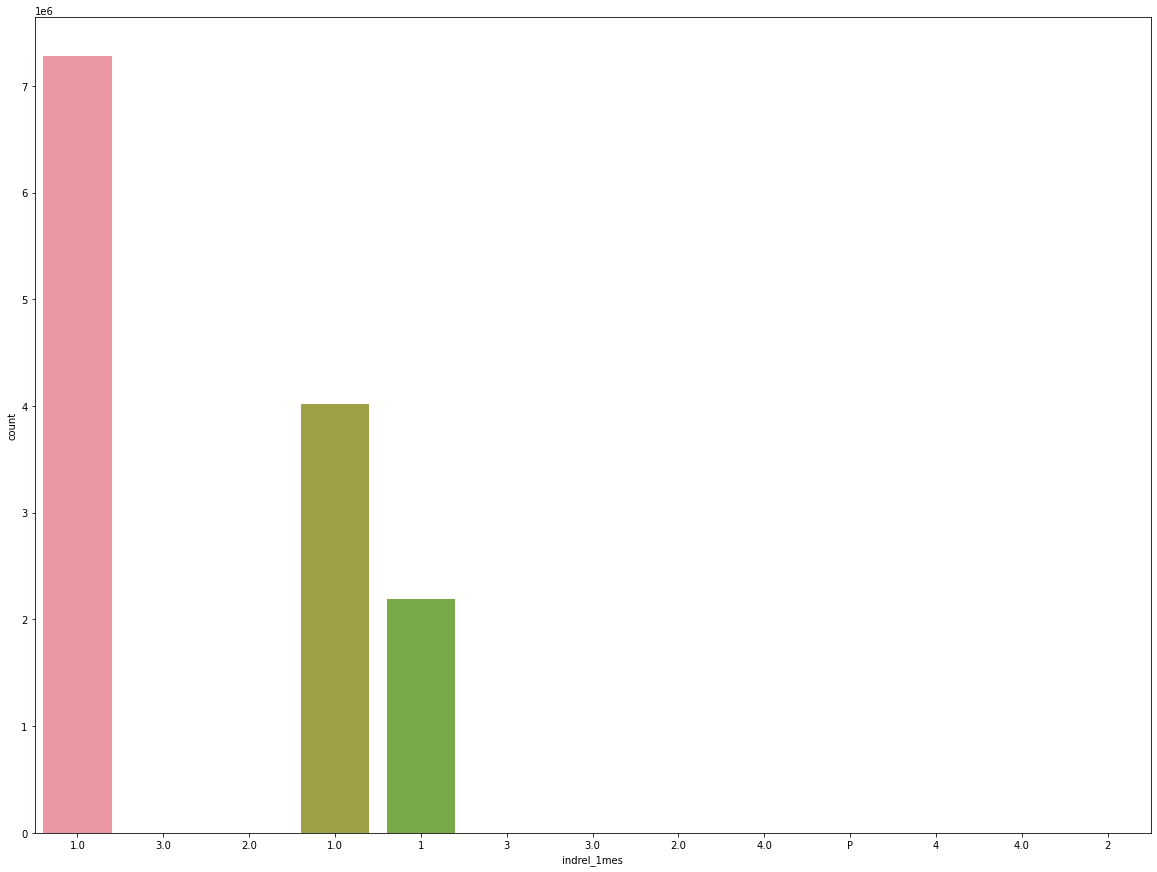

--------------------------------------------------
col :  tiprel_1mes


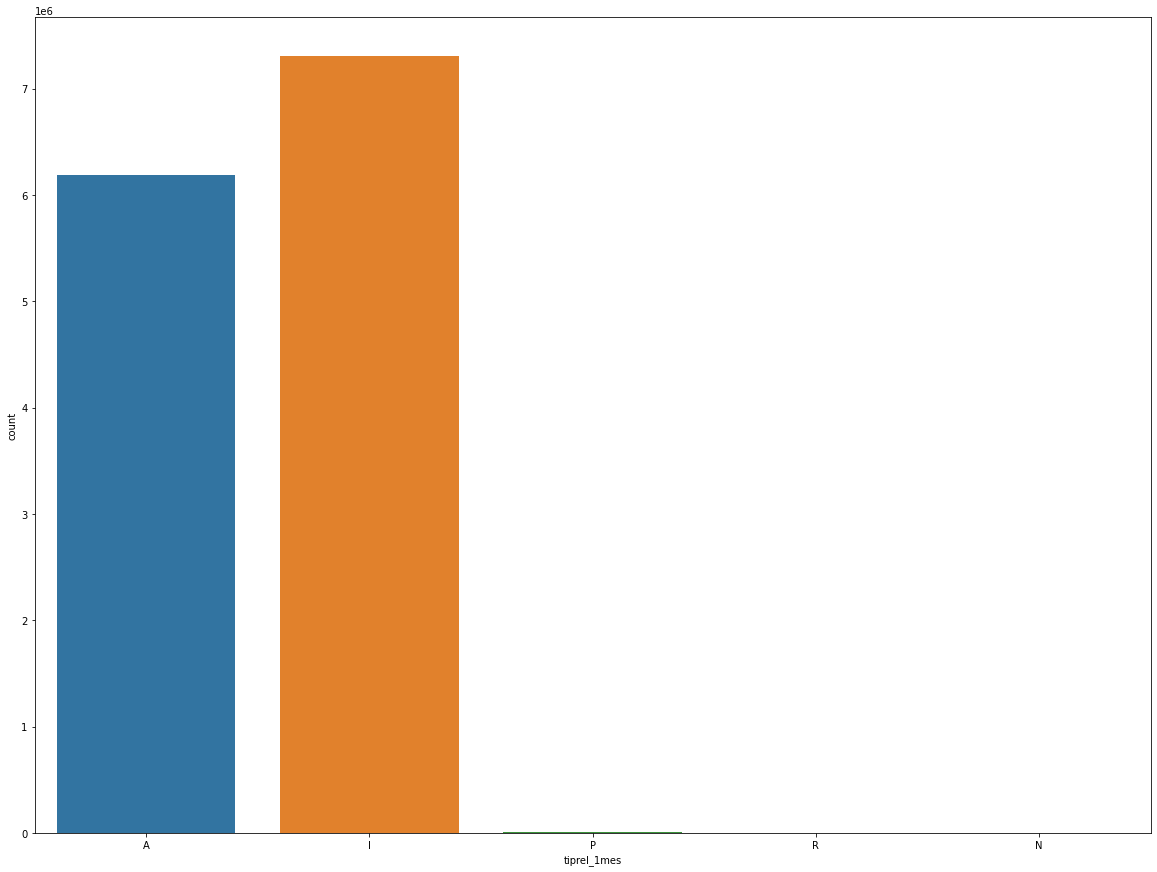

--------------------------------------------------
col :  indresi


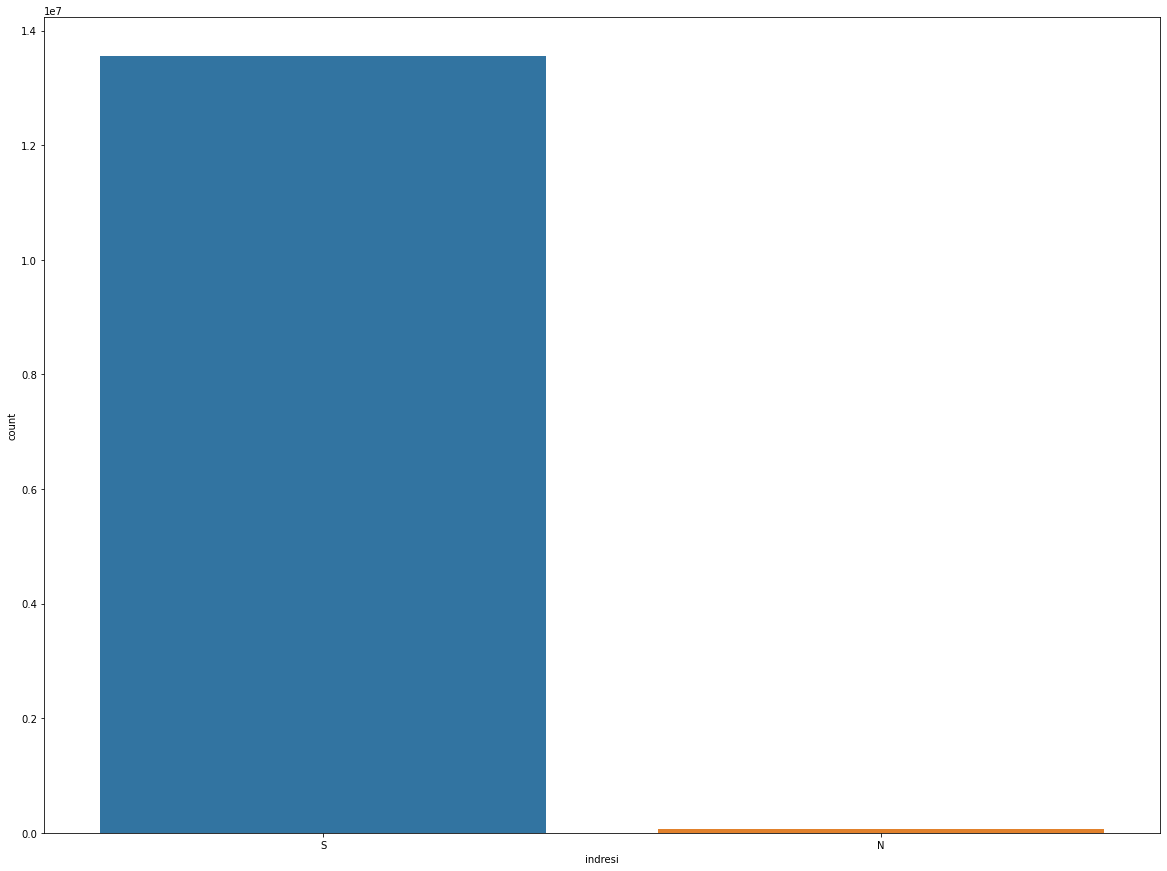

--------------------------------------------------
col :  indext


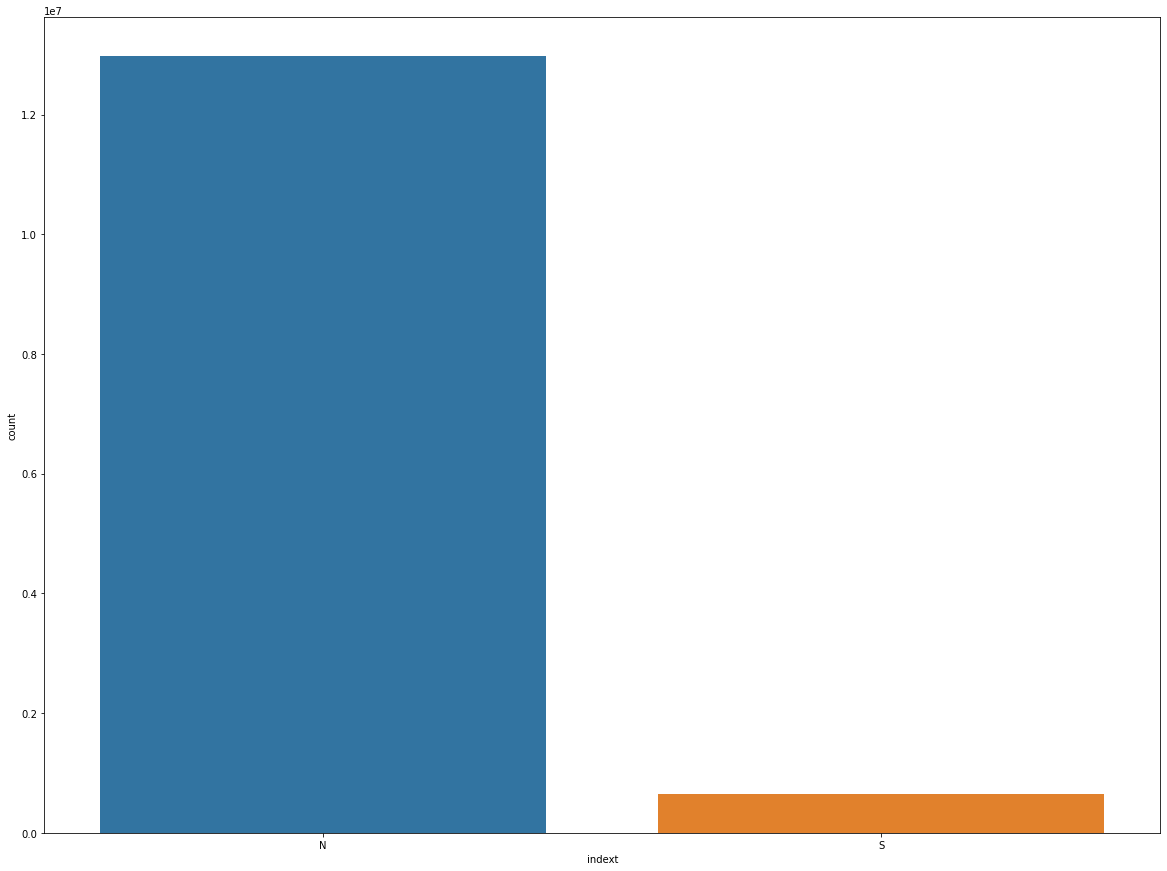

--------------------------------------------------
col :  conyuemp


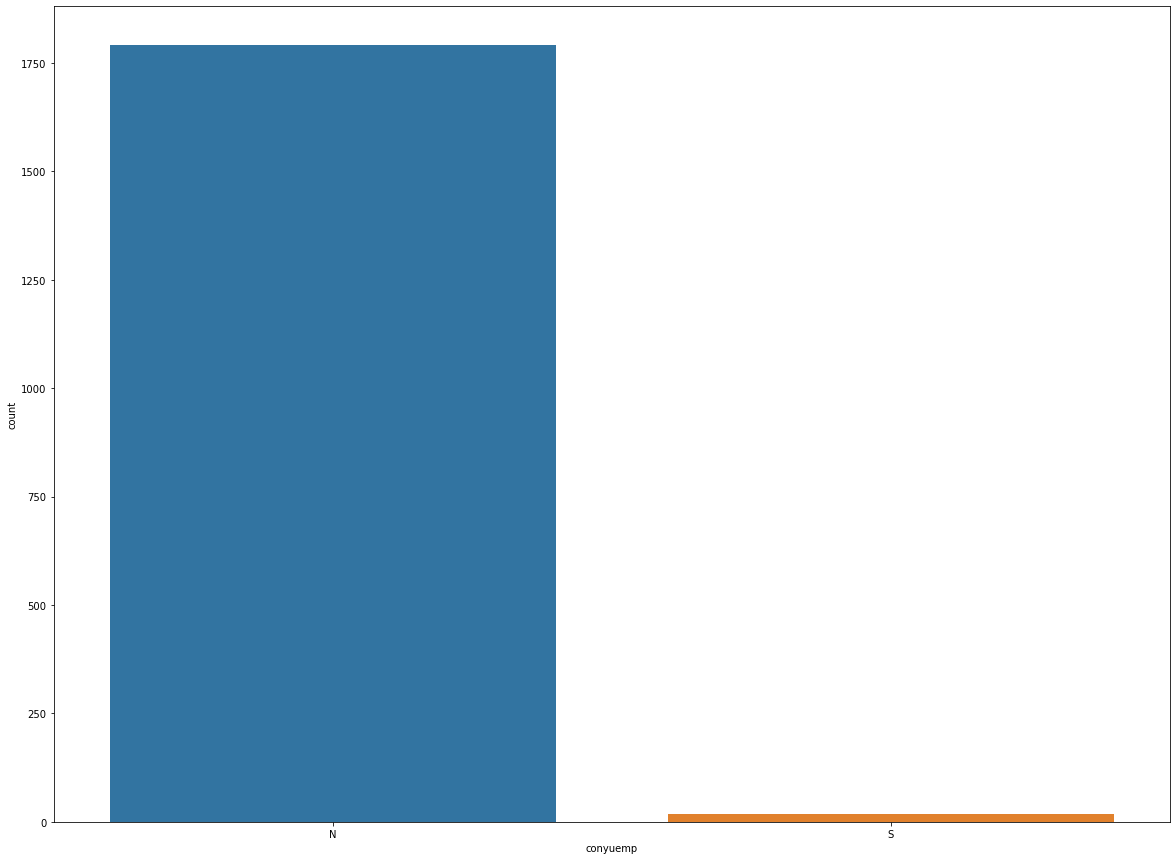

--------------------------------------------------
col :  canal_entrada


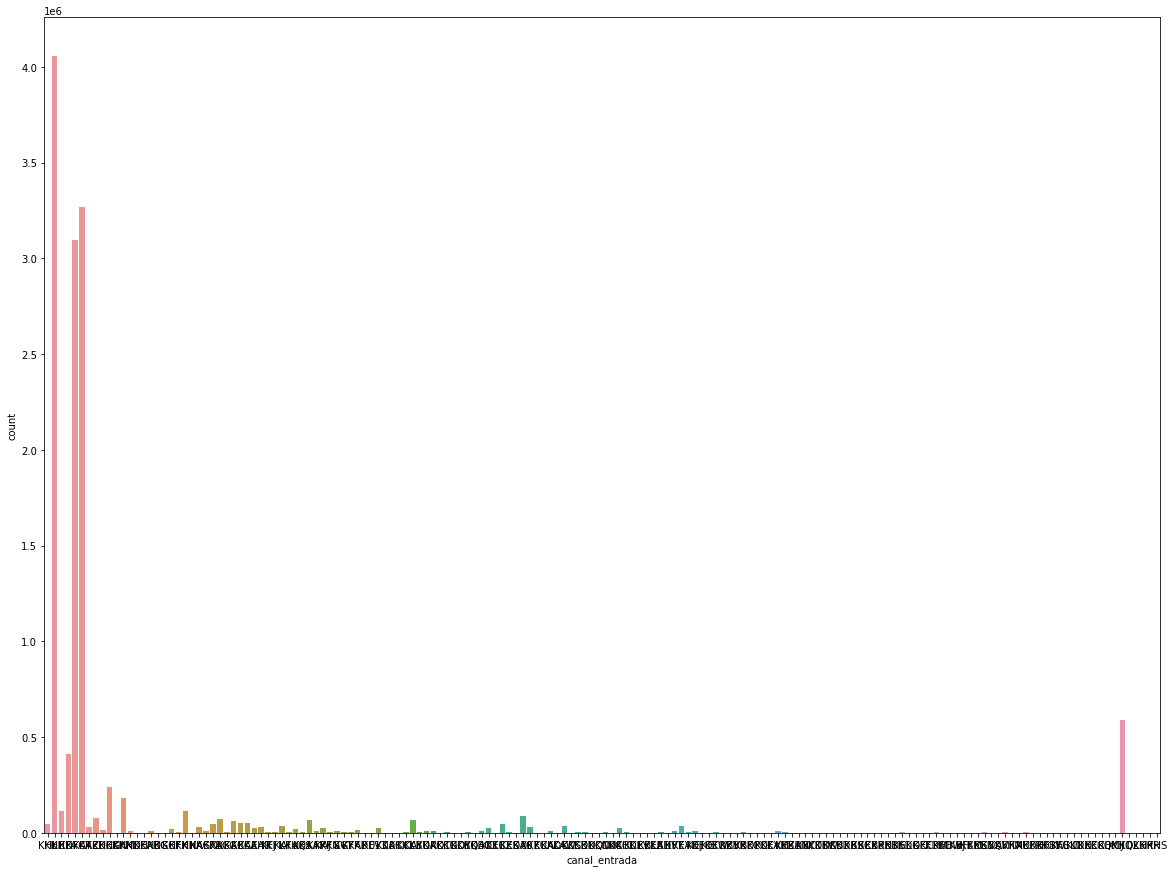

--------------------------------------------------
col :  indfall


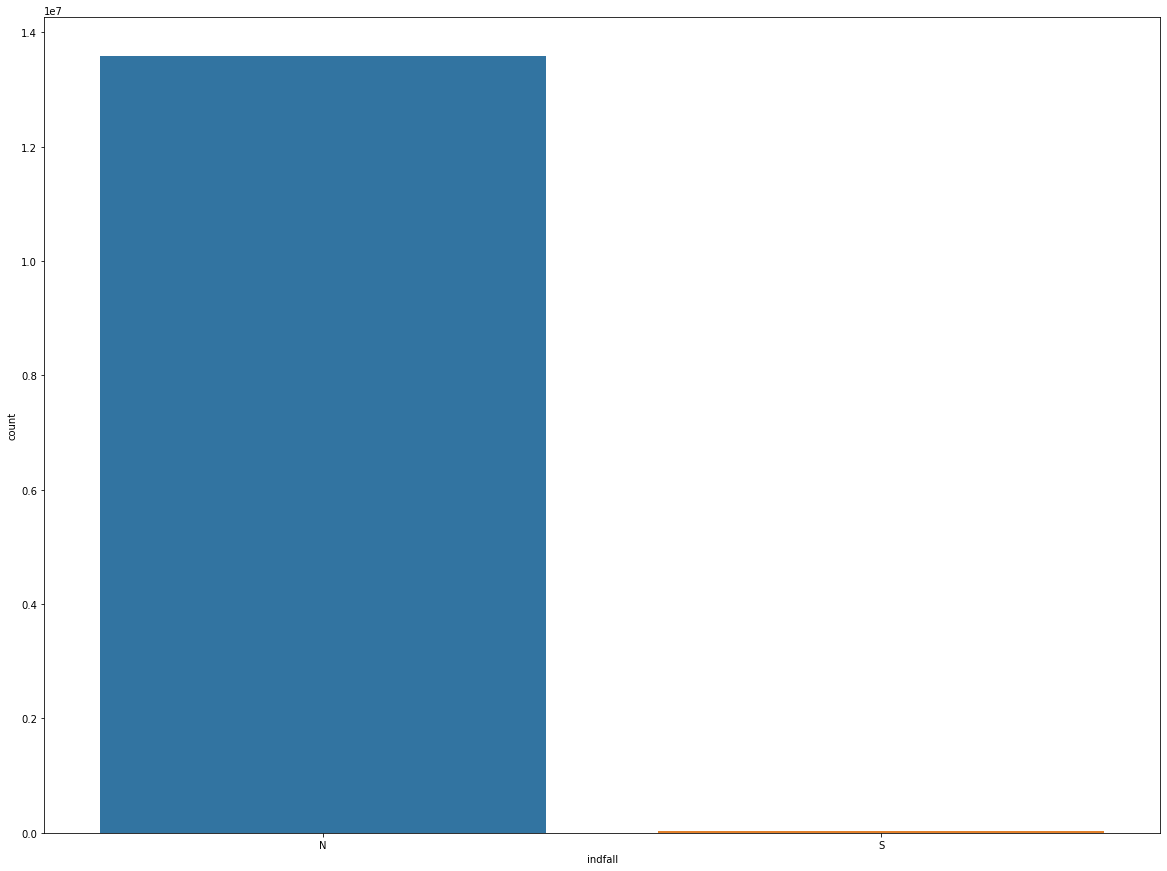

--------------------------------------------------
col :  tipodom


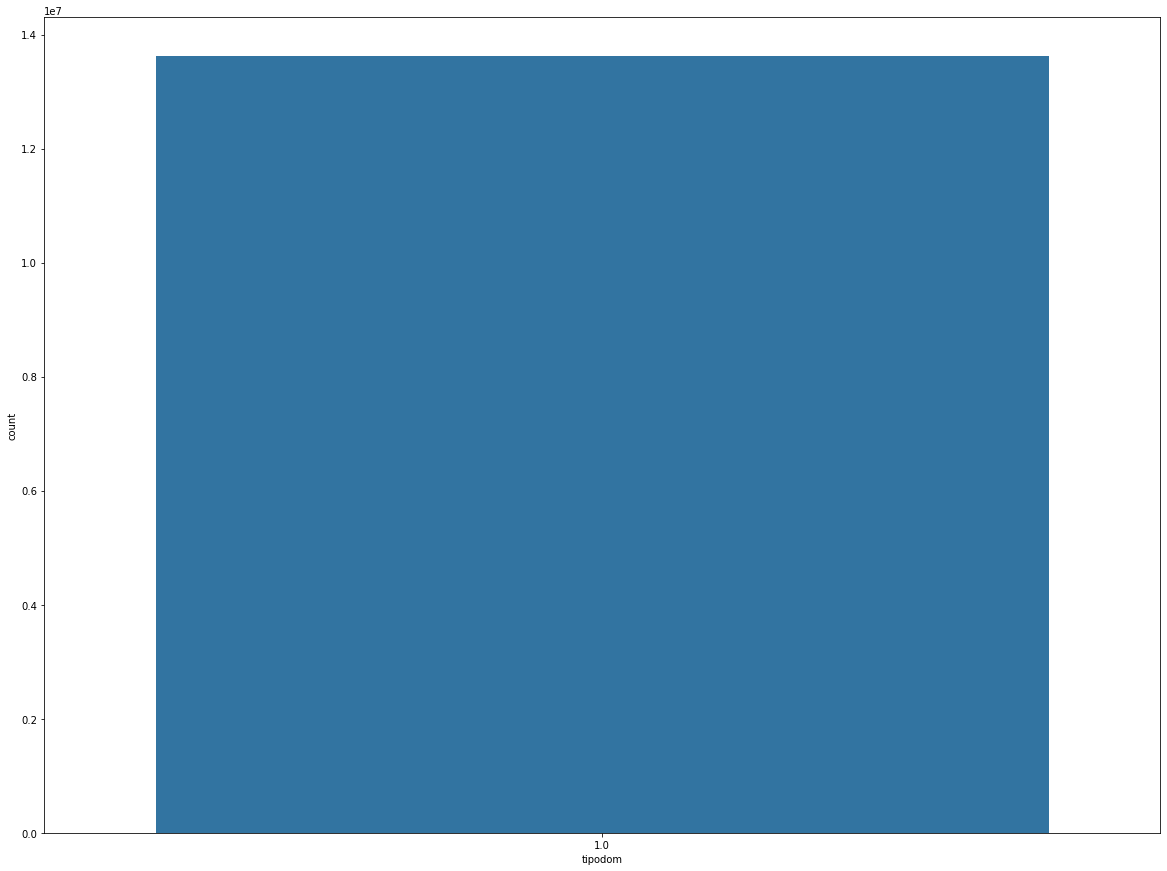

--------------------------------------------------
col :  cod_prov


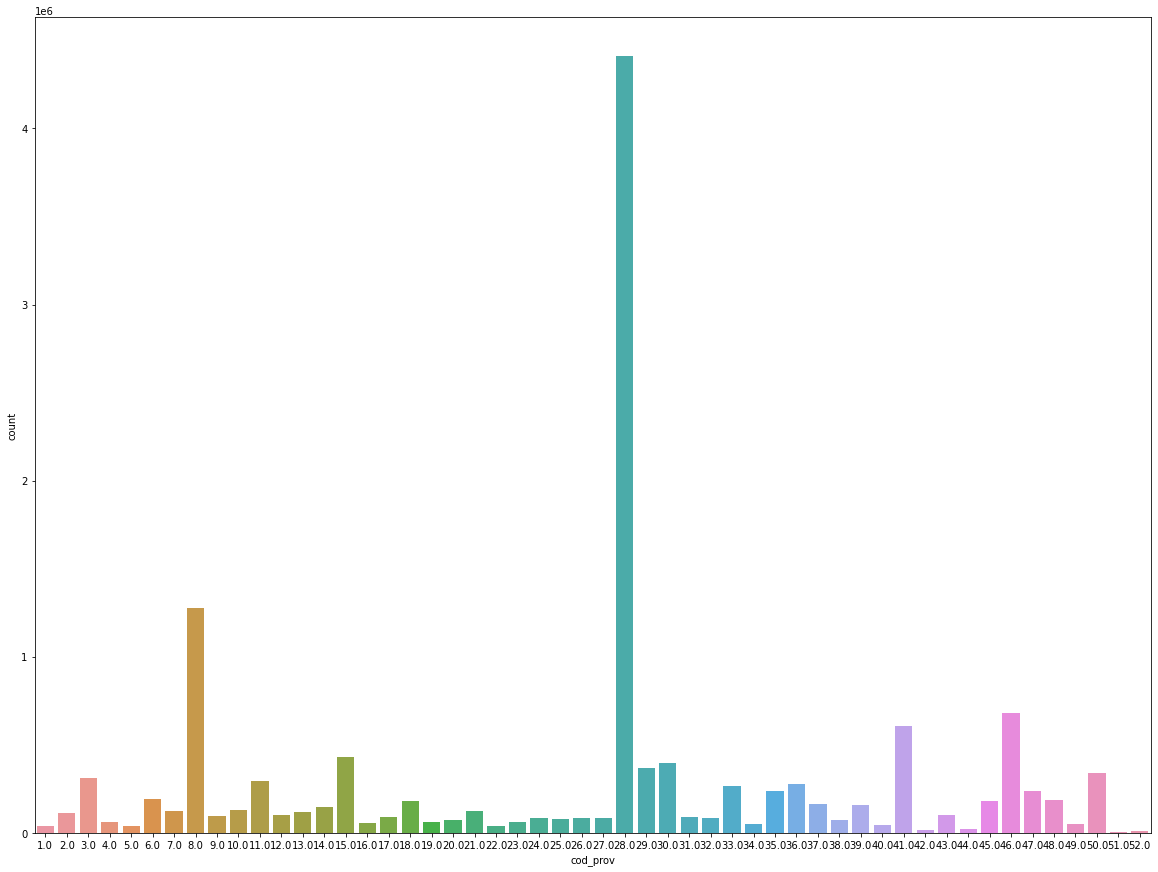

--------------------------------------------------
col :  nomprov


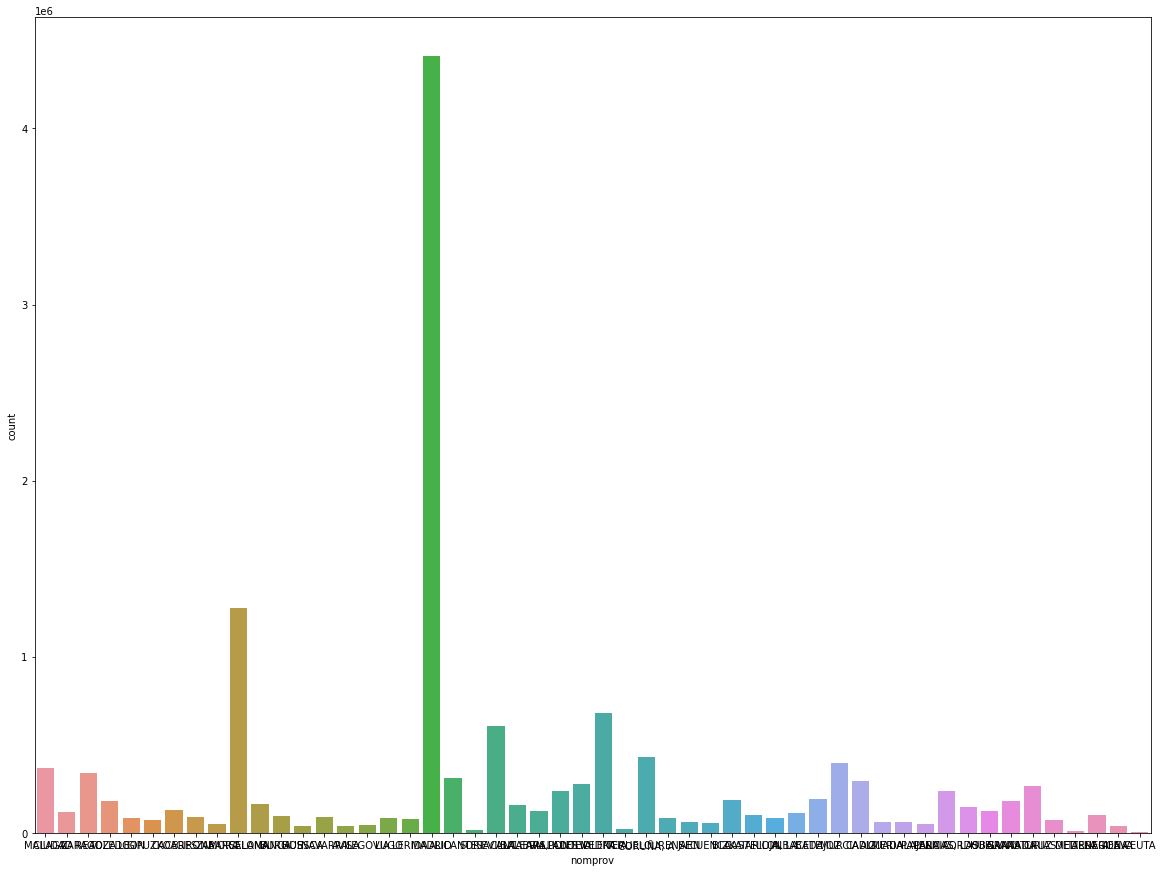

--------------------------------------------------
col :  ind_actividad_cliente


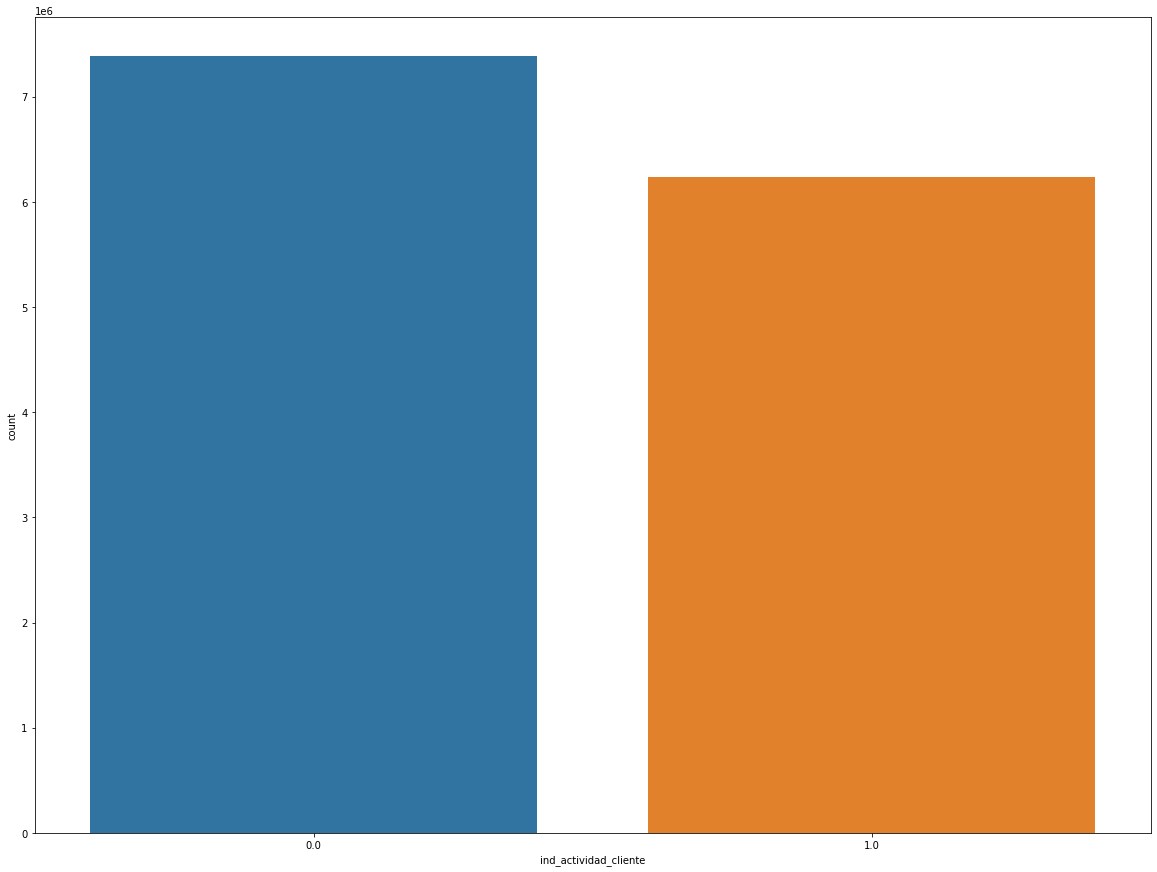

--------------------------------------------------
col :  segmento


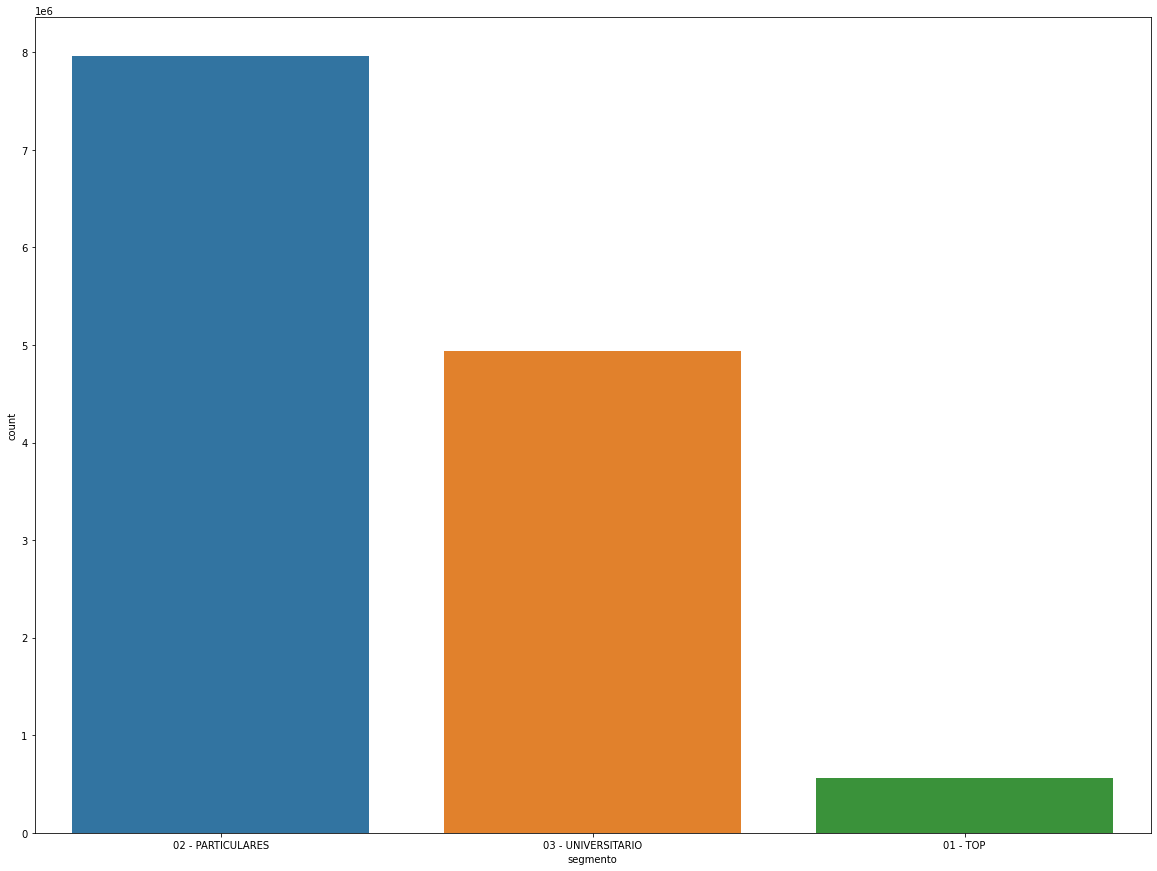

--------------------------------------------------
col :  ind_ahor_fin_ult1


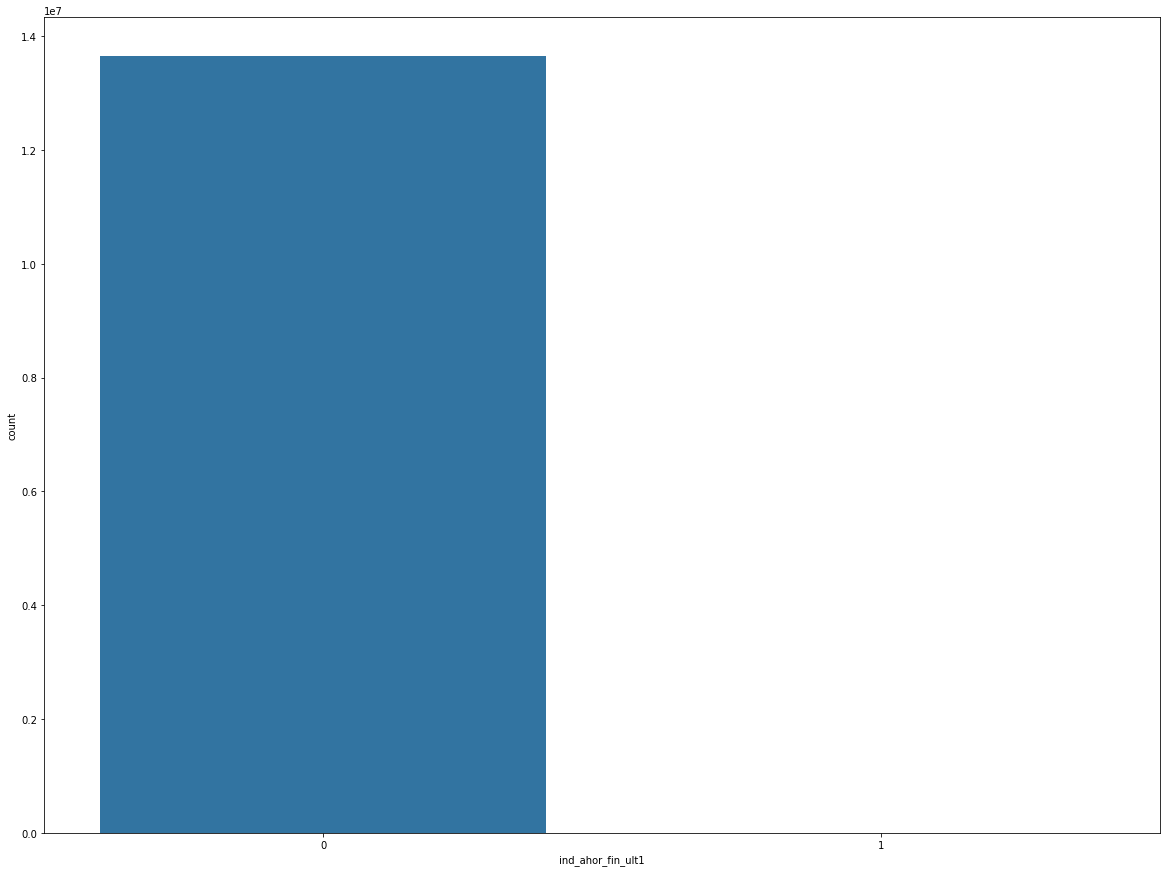

--------------------------------------------------
col :  ind_aval_fin_ult1


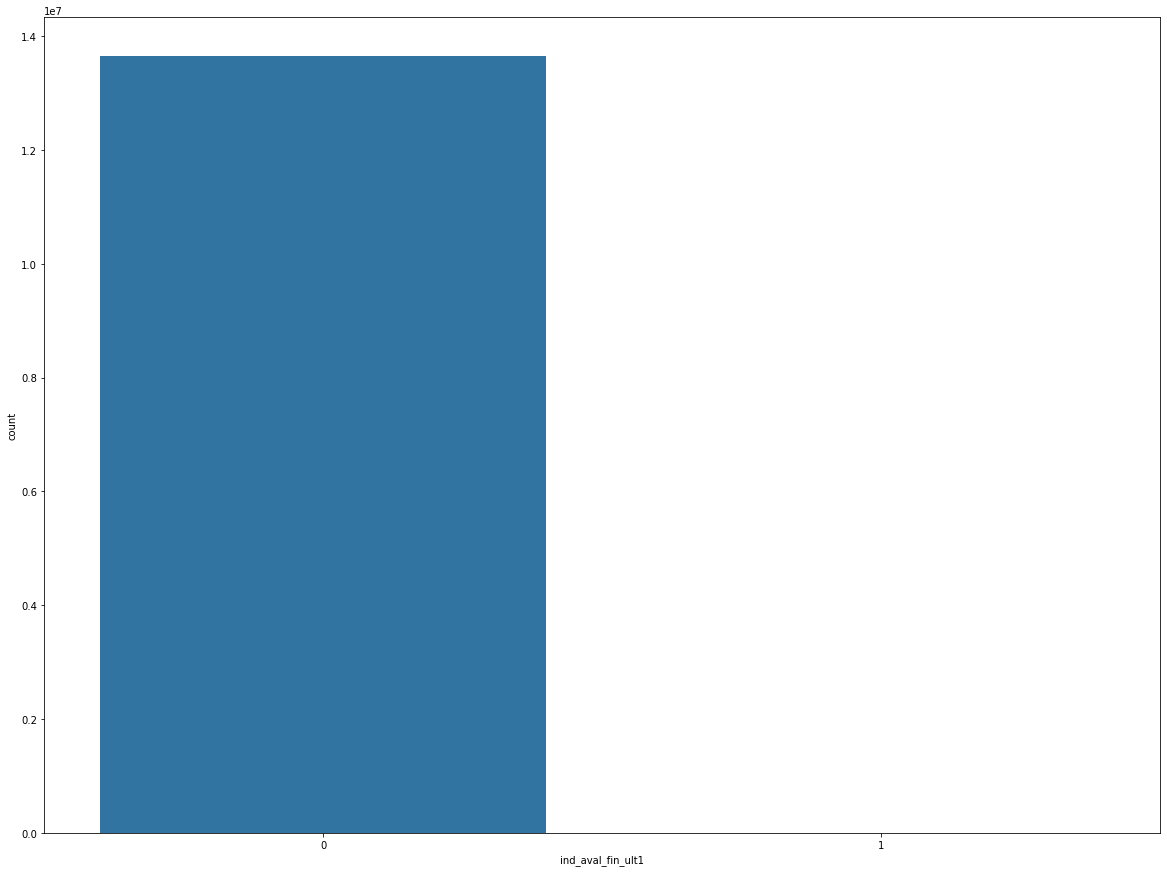

--------------------------------------------------
col :  ind_cco_fin_ult1


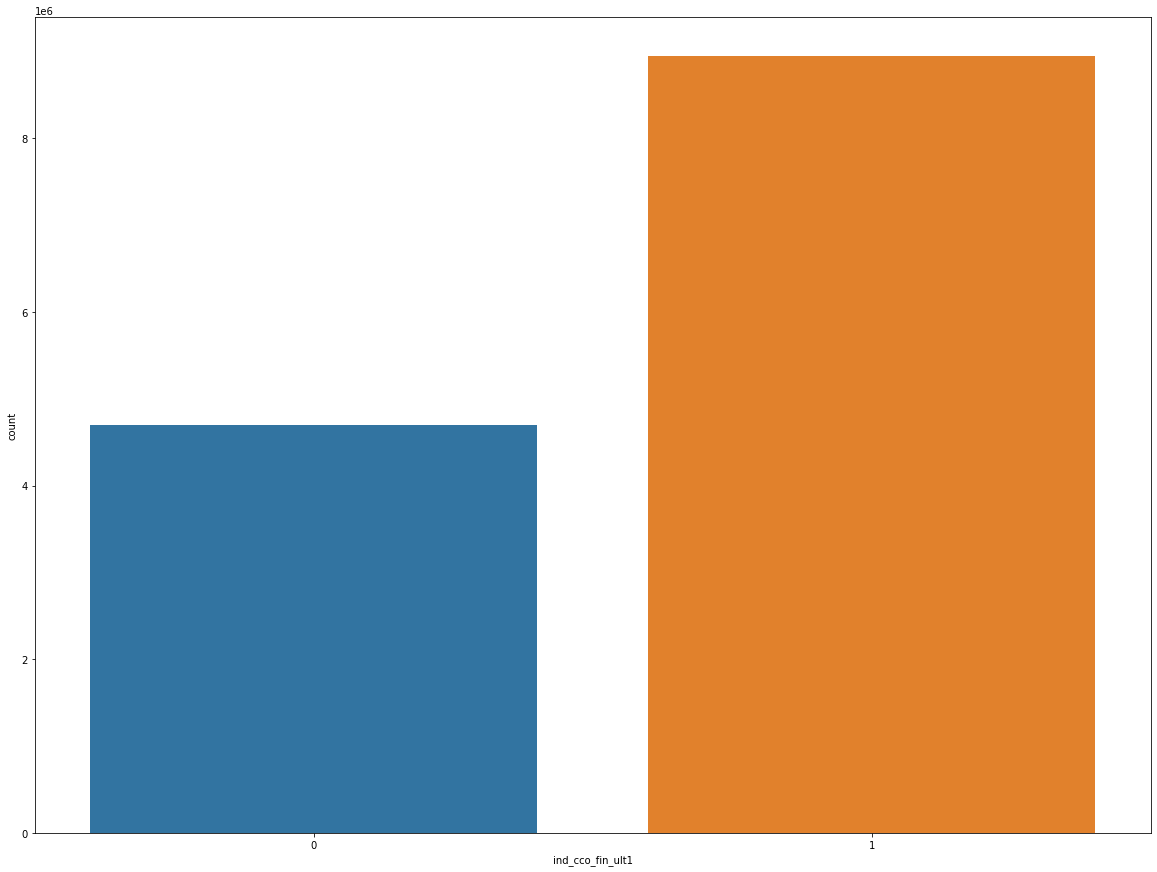

--------------------------------------------------
col :  ind_cder_fin_ult1


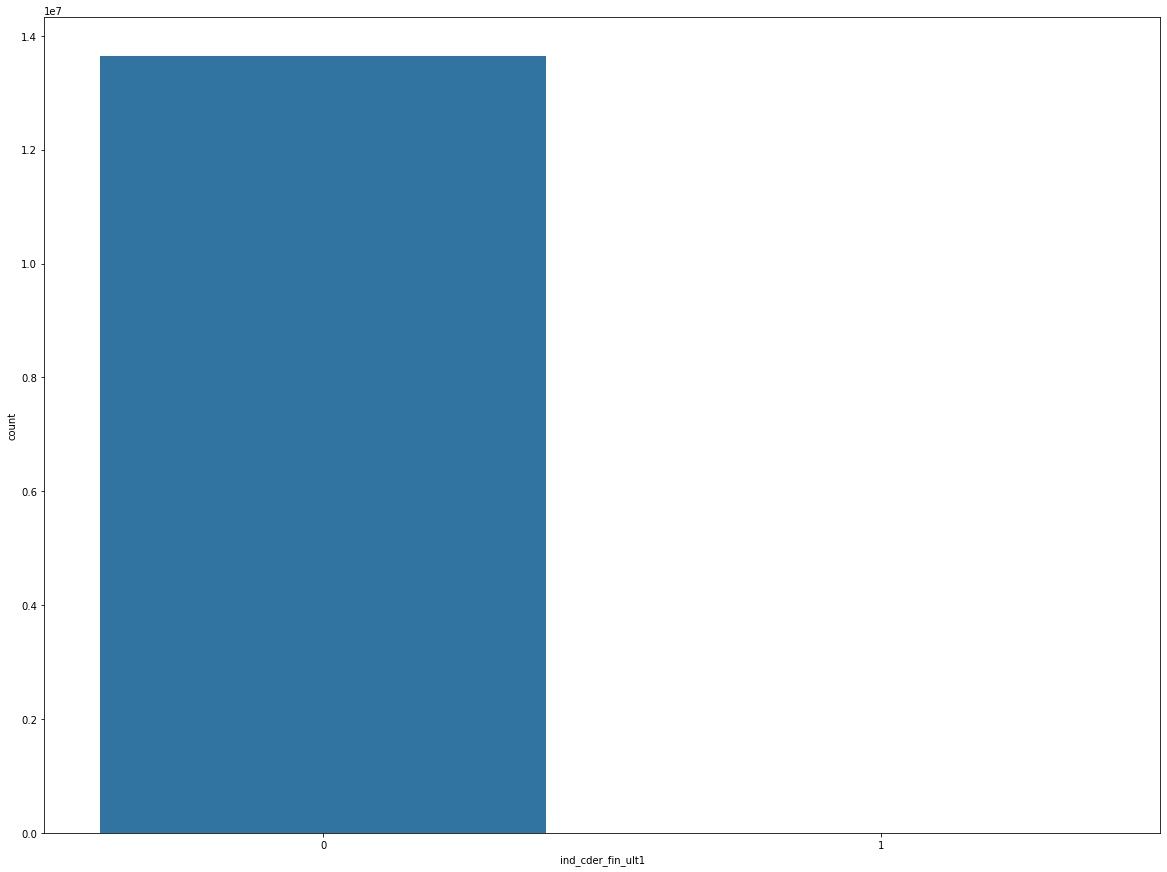

--------------------------------------------------
col :  ind_cno_fin_ult1


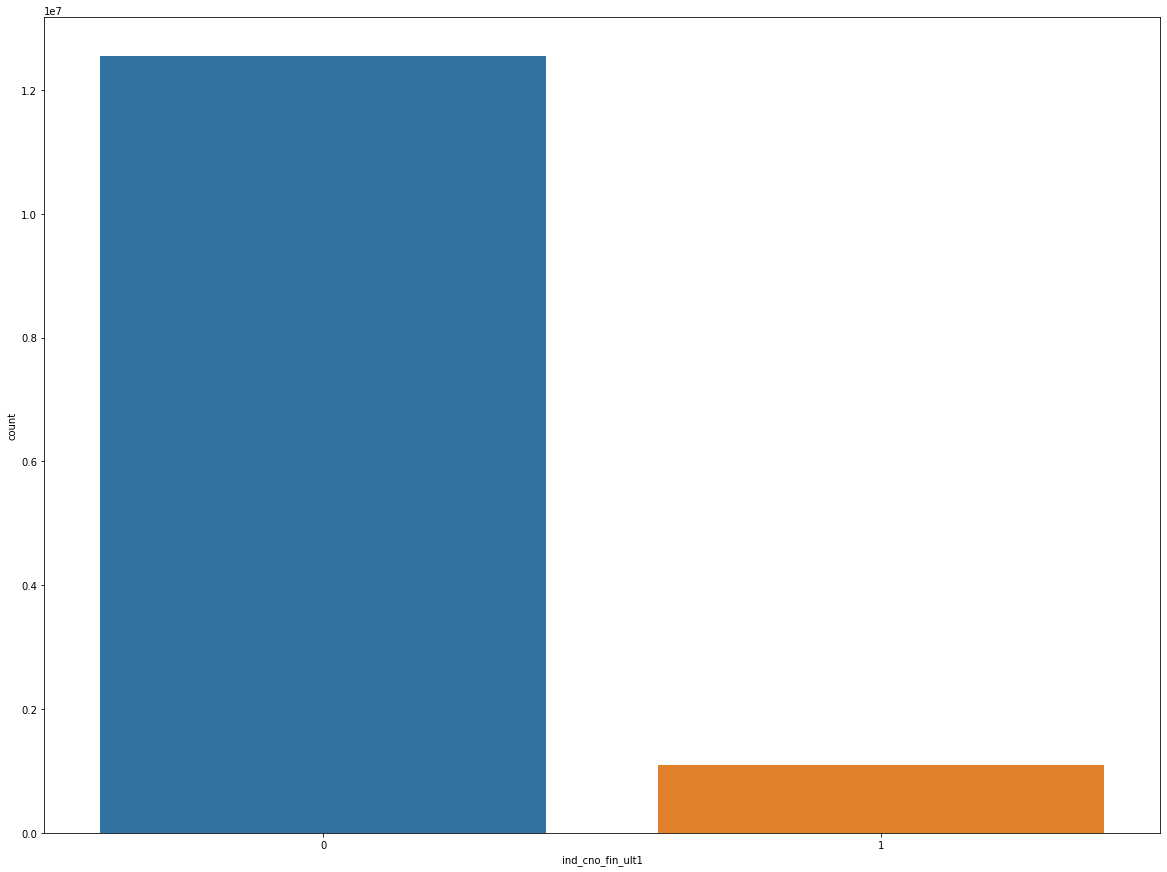

--------------------------------------------------
col :  ind_ctju_fin_ult1


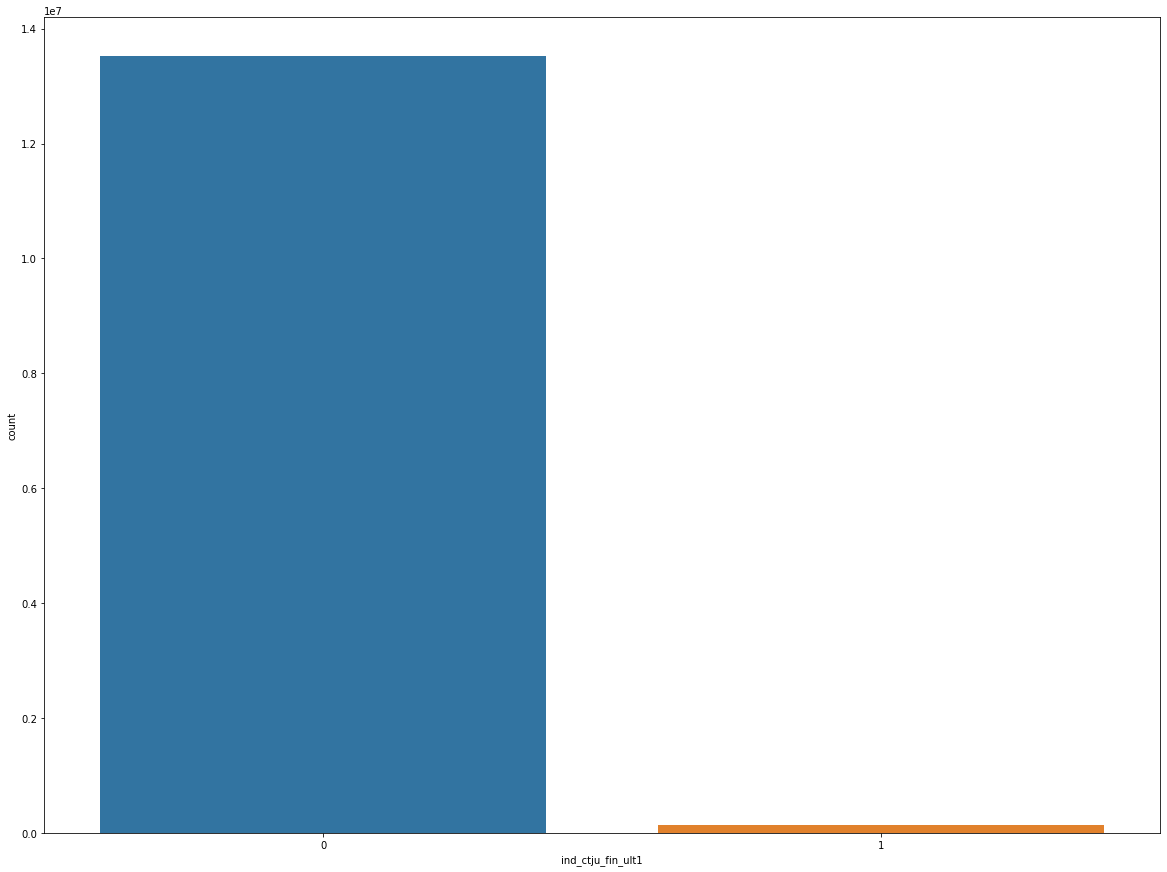

--------------------------------------------------
col :  ind_ctma_fin_ult1


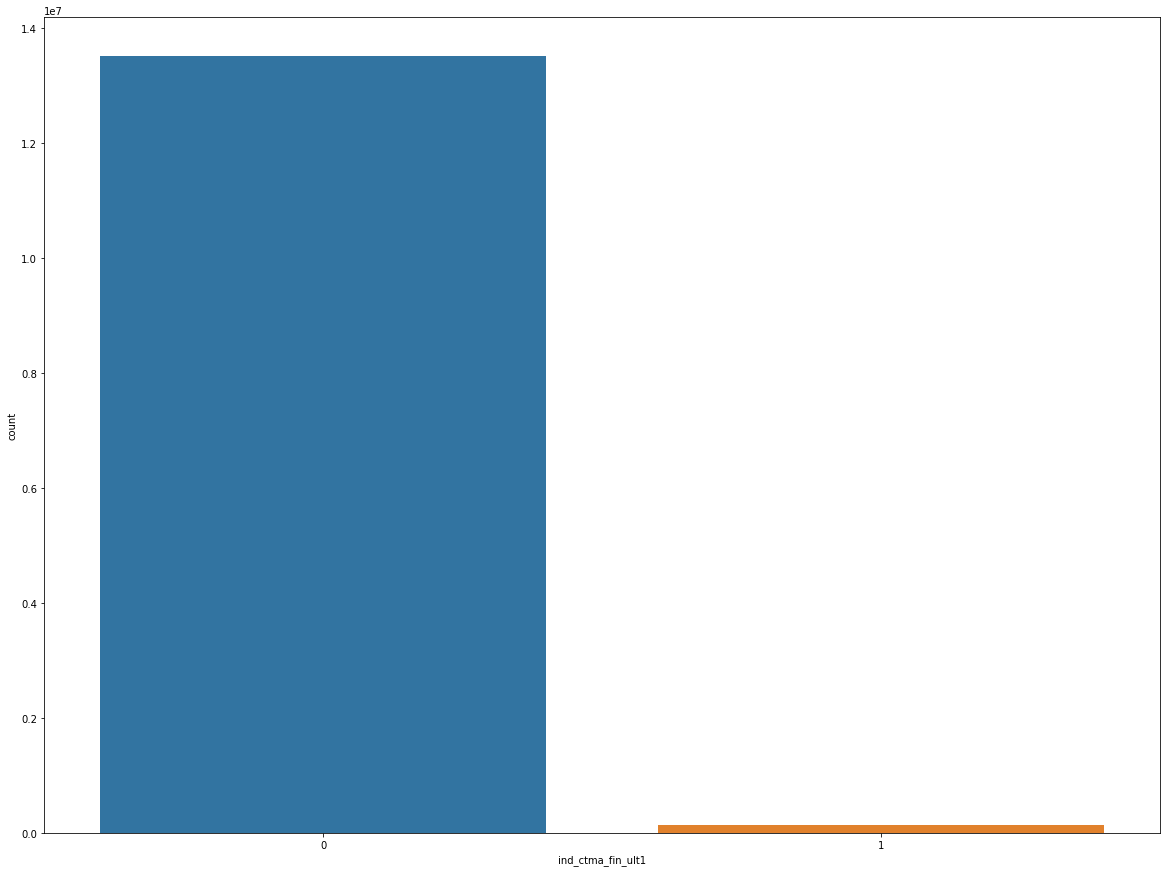

--------------------------------------------------
col :  ind_ctop_fin_ult1


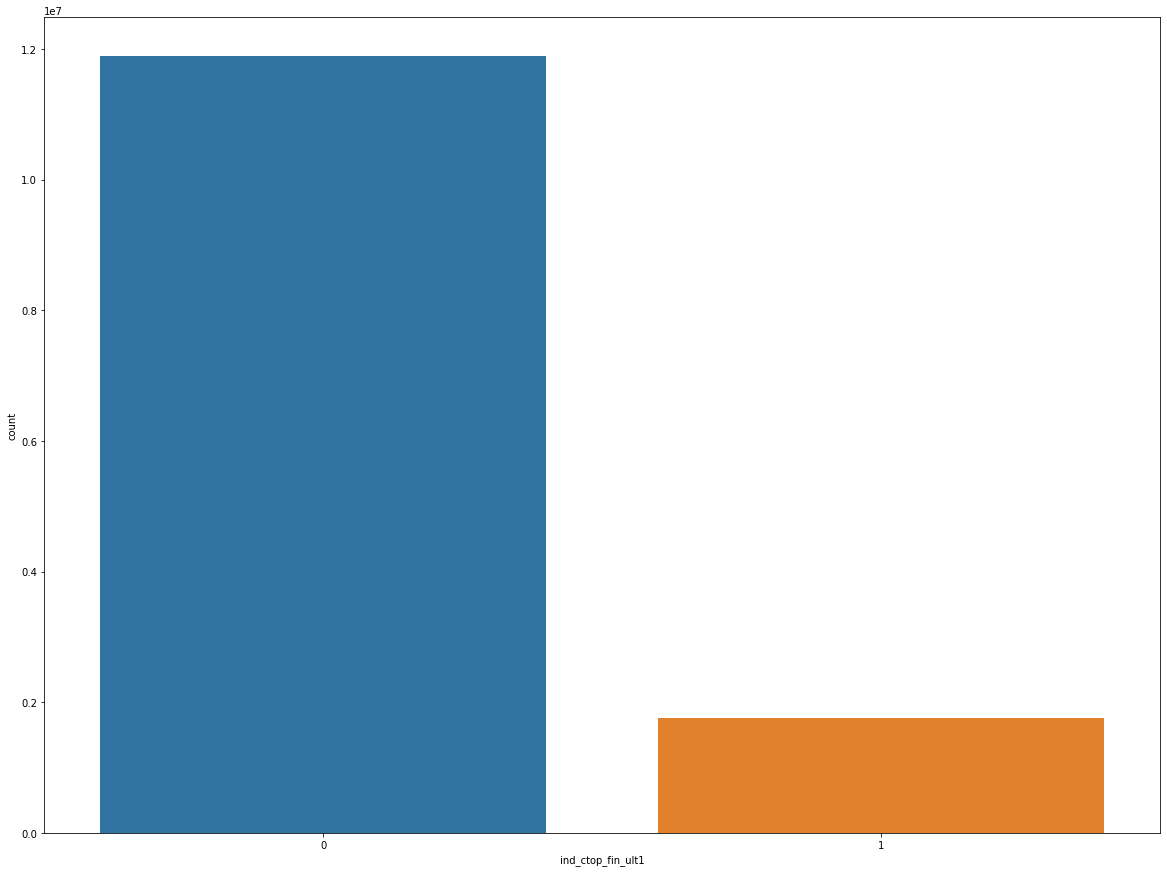

--------------------------------------------------
col :  ind_ctpp_fin_ult1


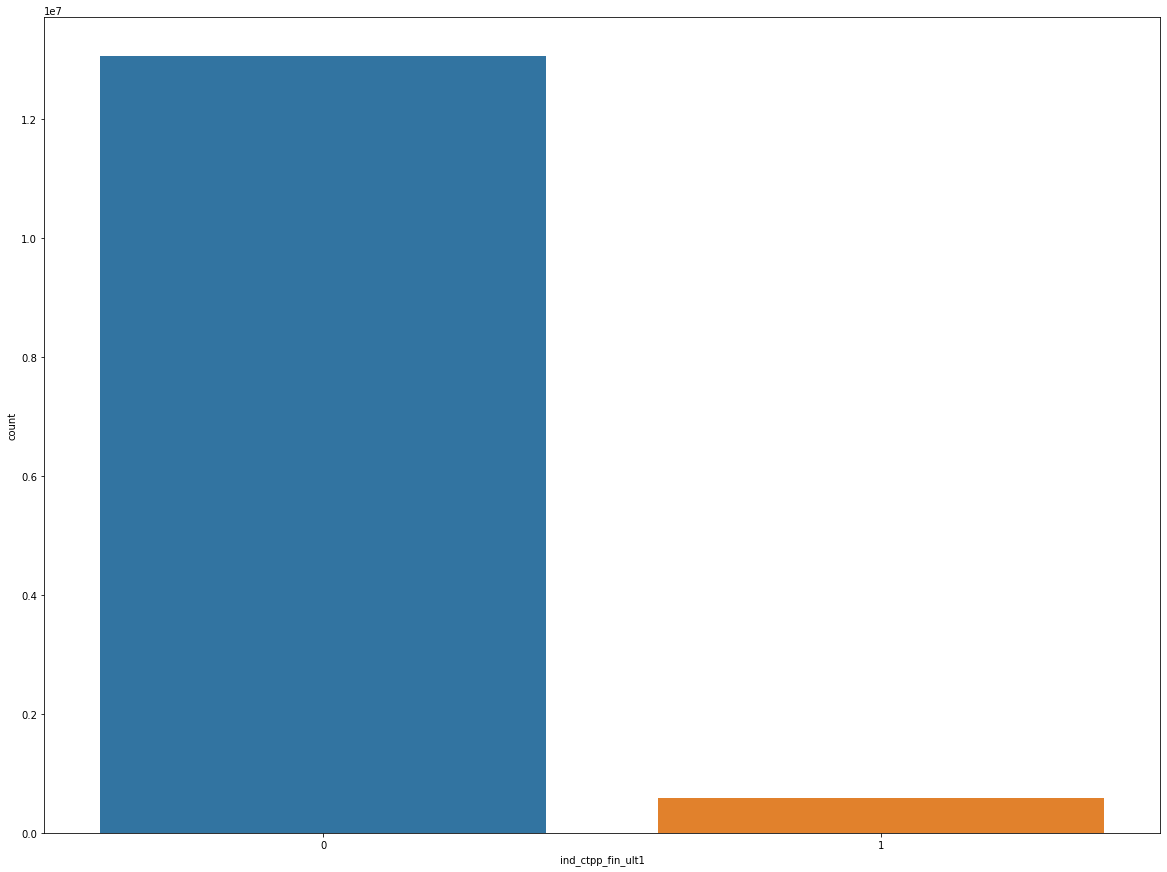

--------------------------------------------------
col :  ind_deco_fin_ult1


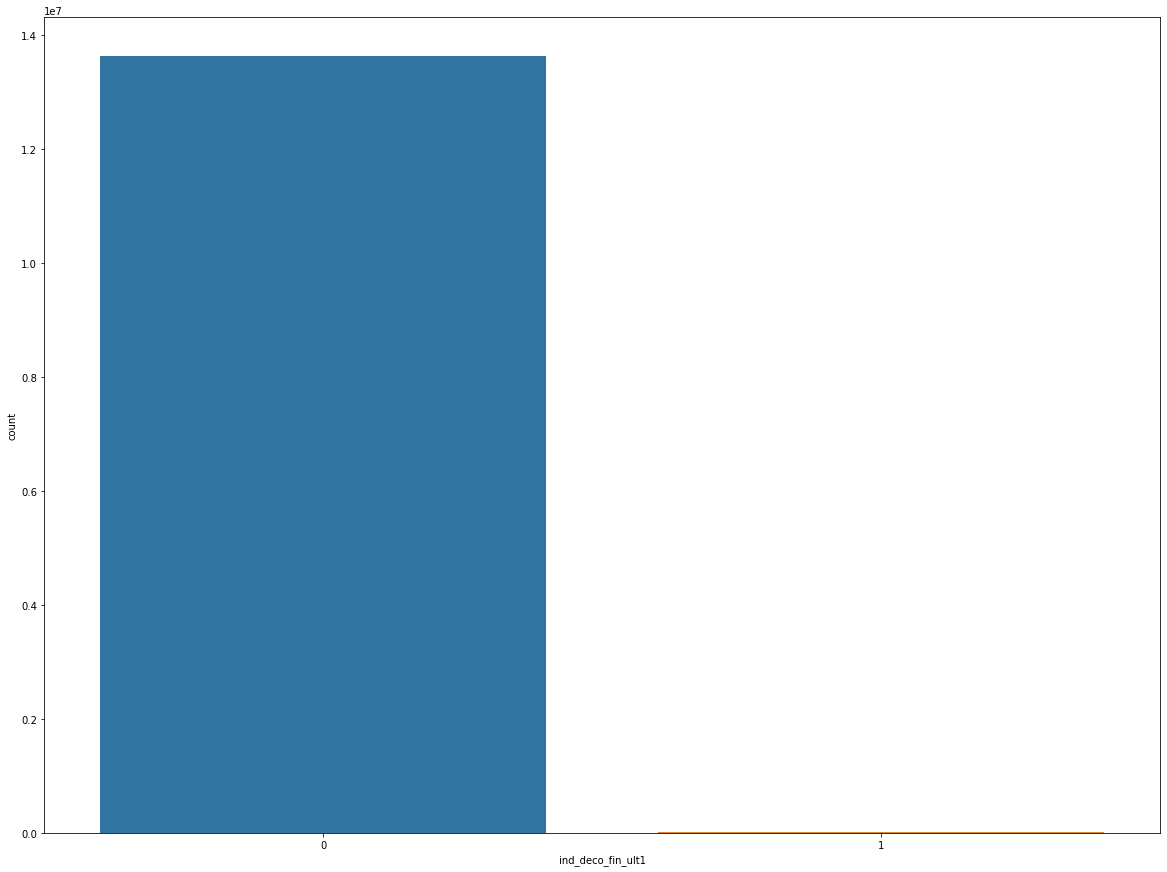

--------------------------------------------------
col :  ind_deme_fin_ult1


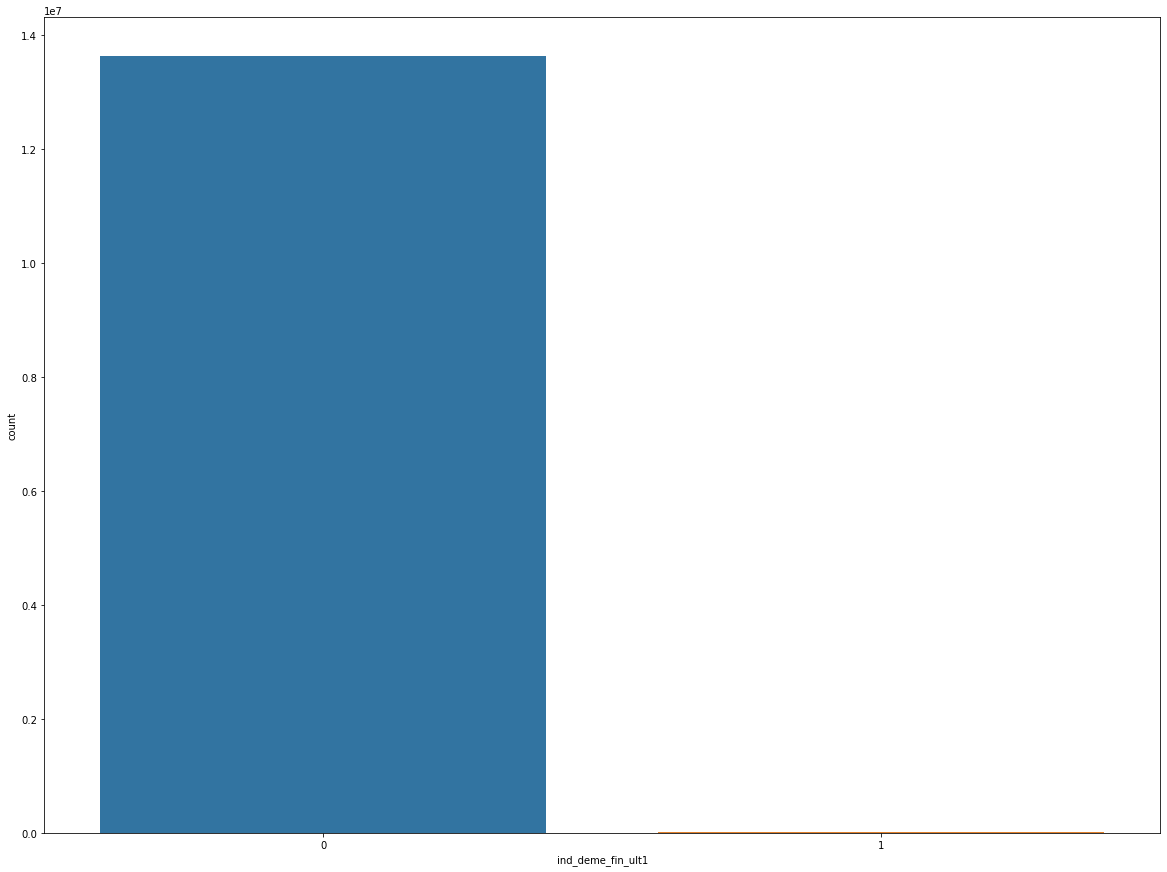

--------------------------------------------------
col :  ind_dela_fin_ult1


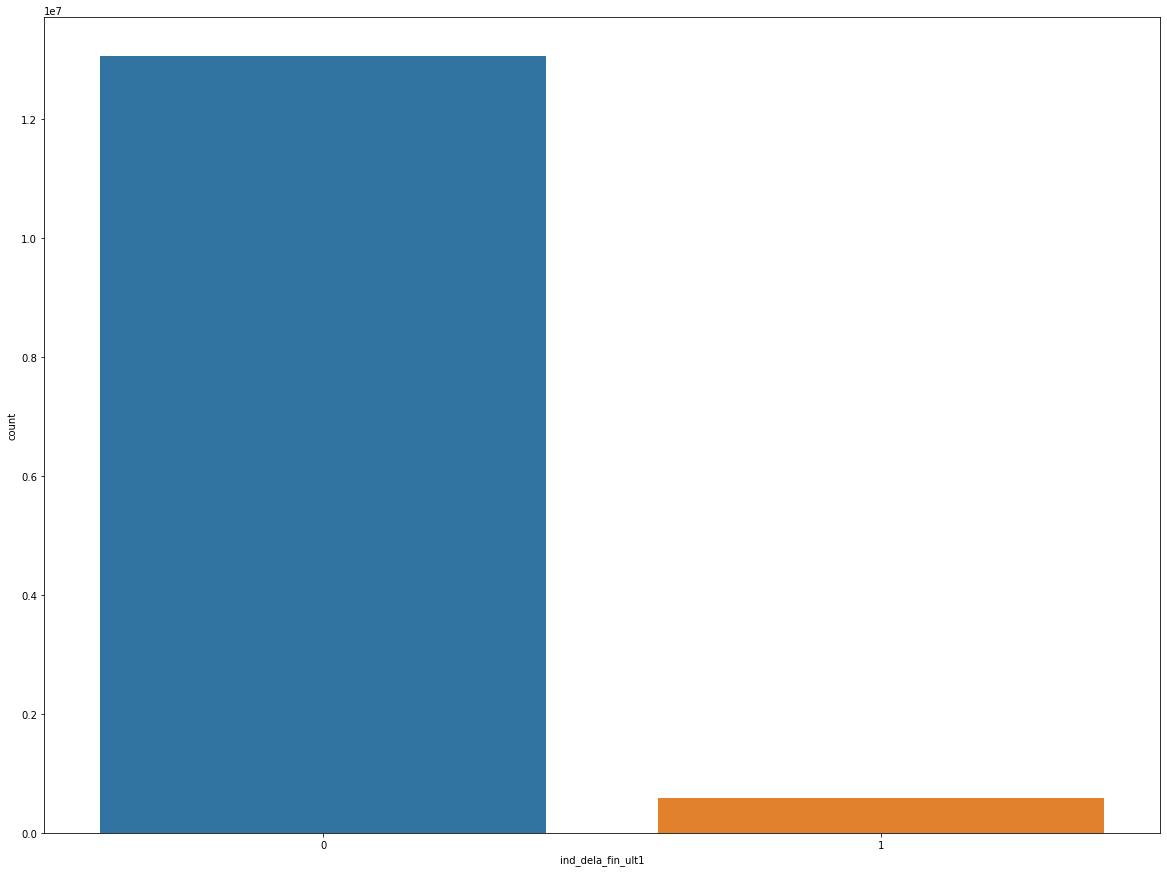

--------------------------------------------------
col :  ind_ecue_fin_ult1


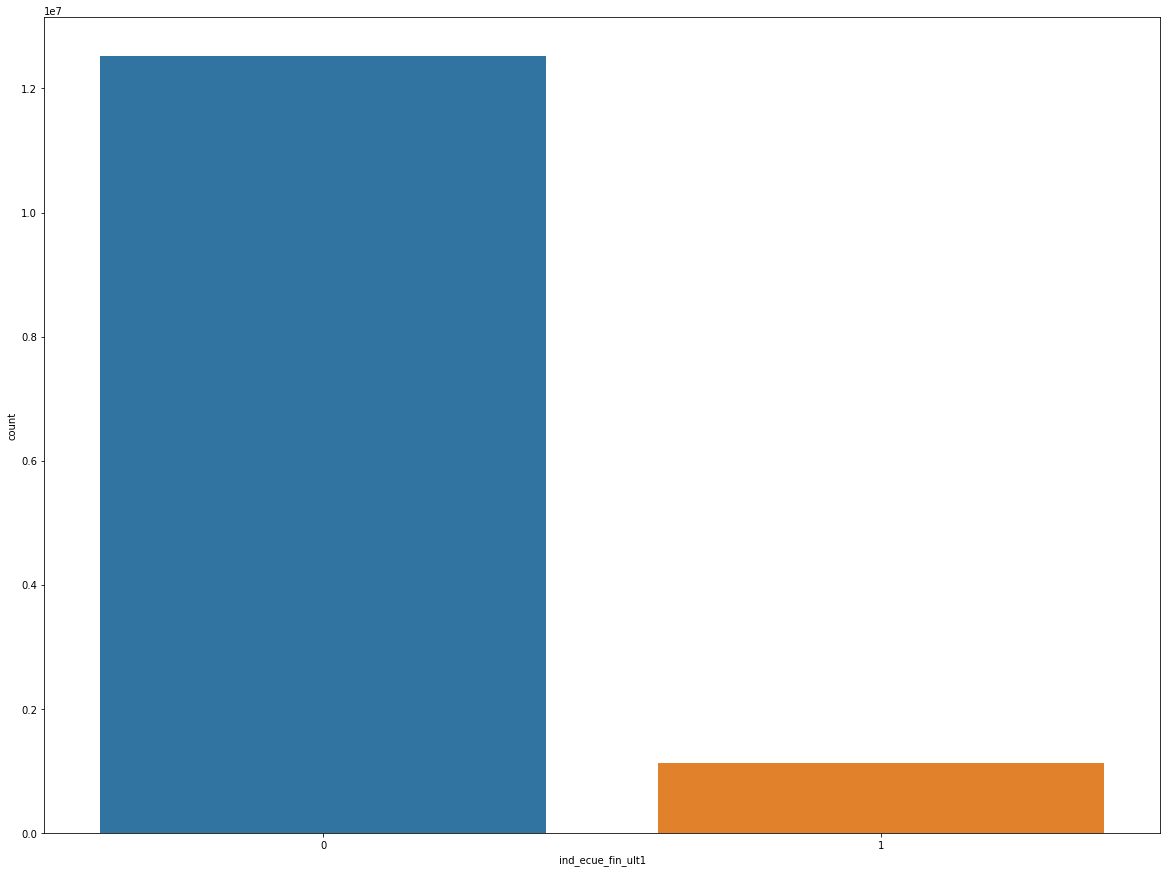

--------------------------------------------------
col :  ind_fond_fin_ult1


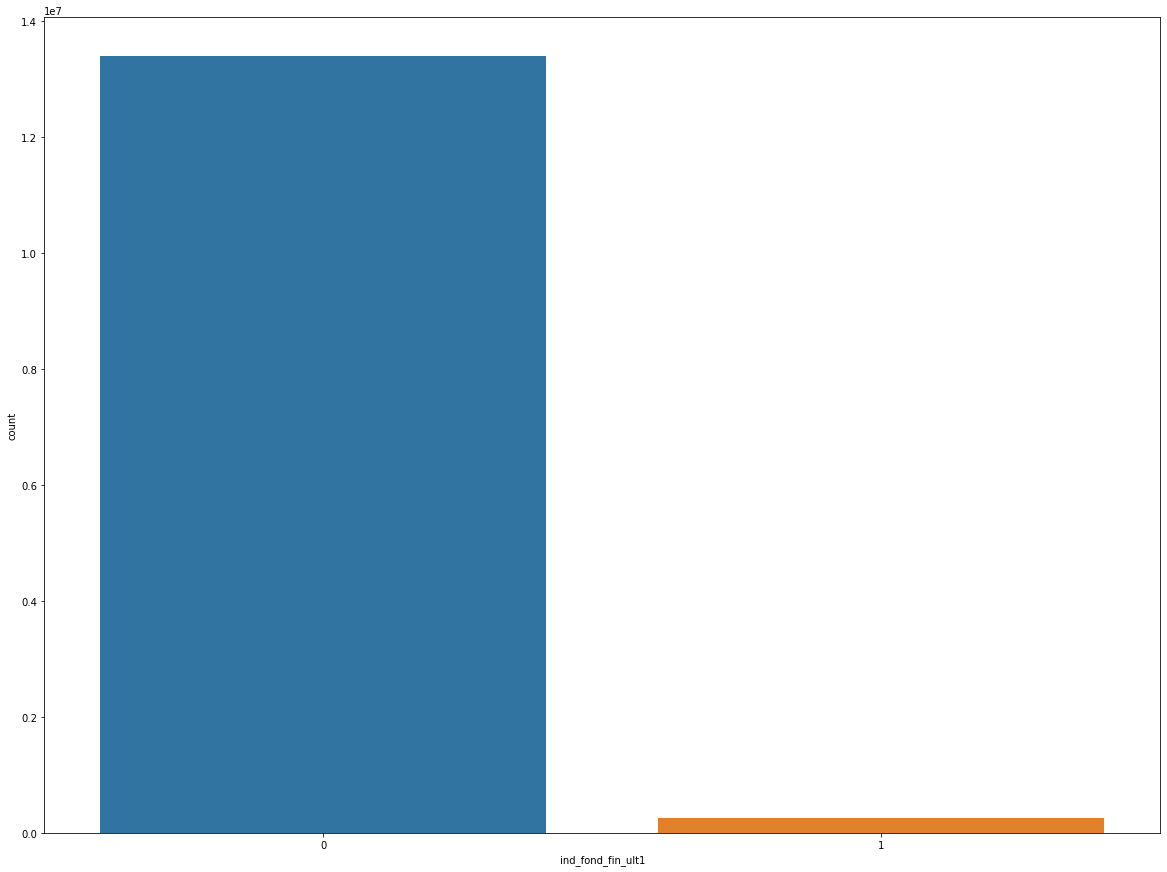

--------------------------------------------------
col :  ind_hip_fin_ult1


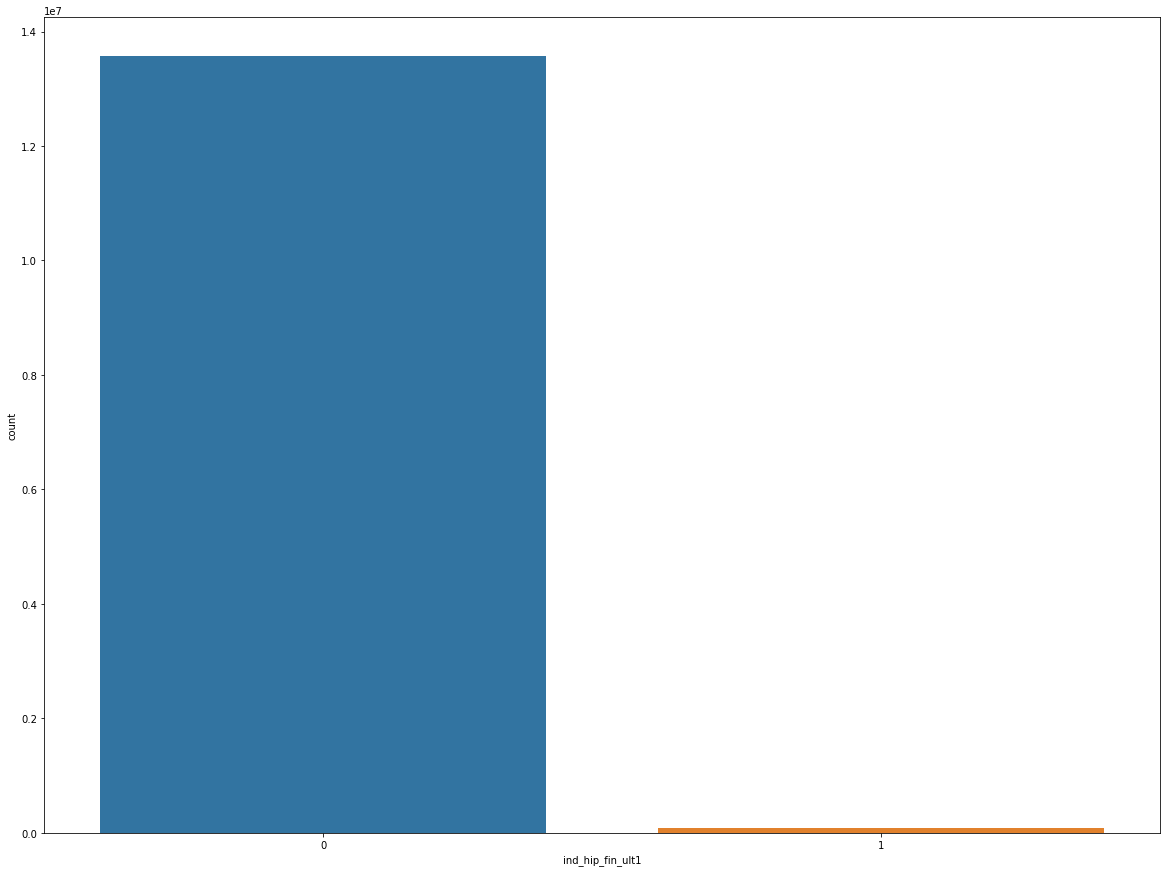

--------------------------------------------------
col :  ind_plan_fin_ult1


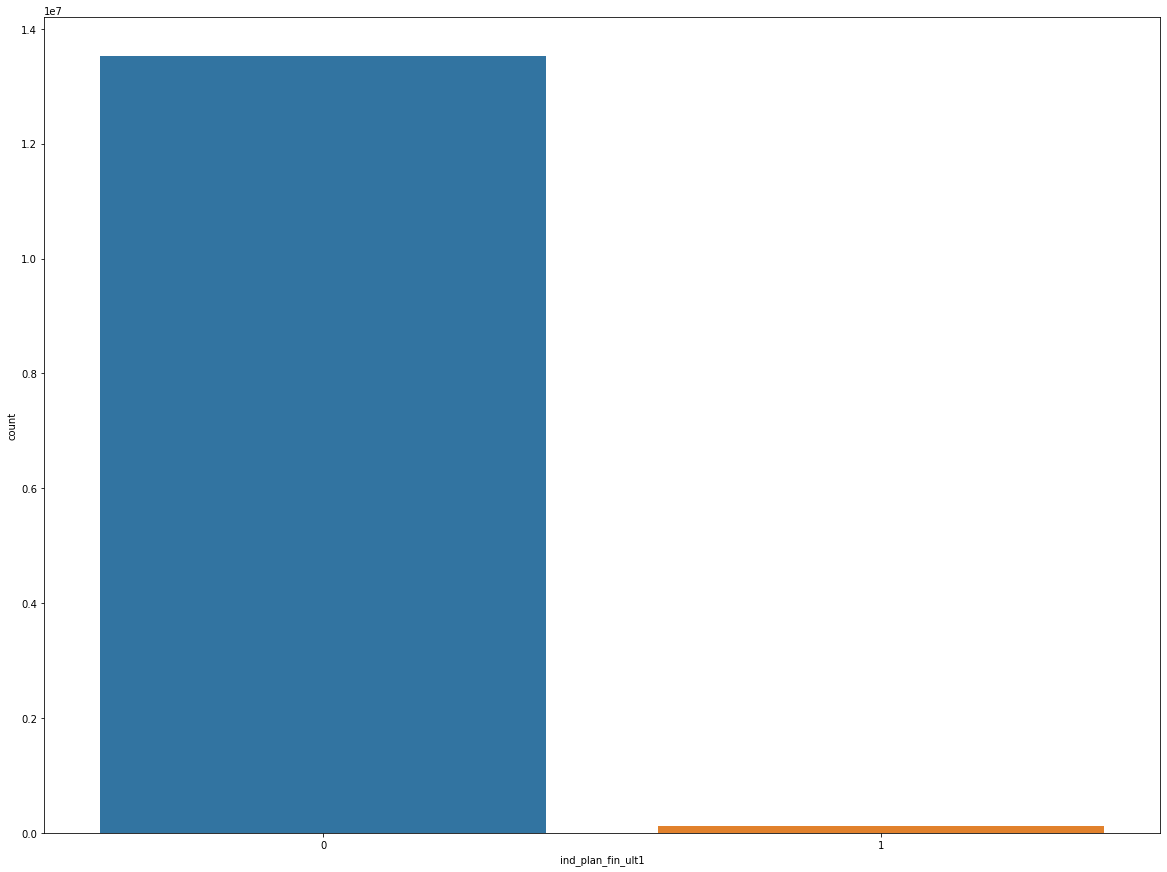

--------------------------------------------------
col :  ind_pres_fin_ult1


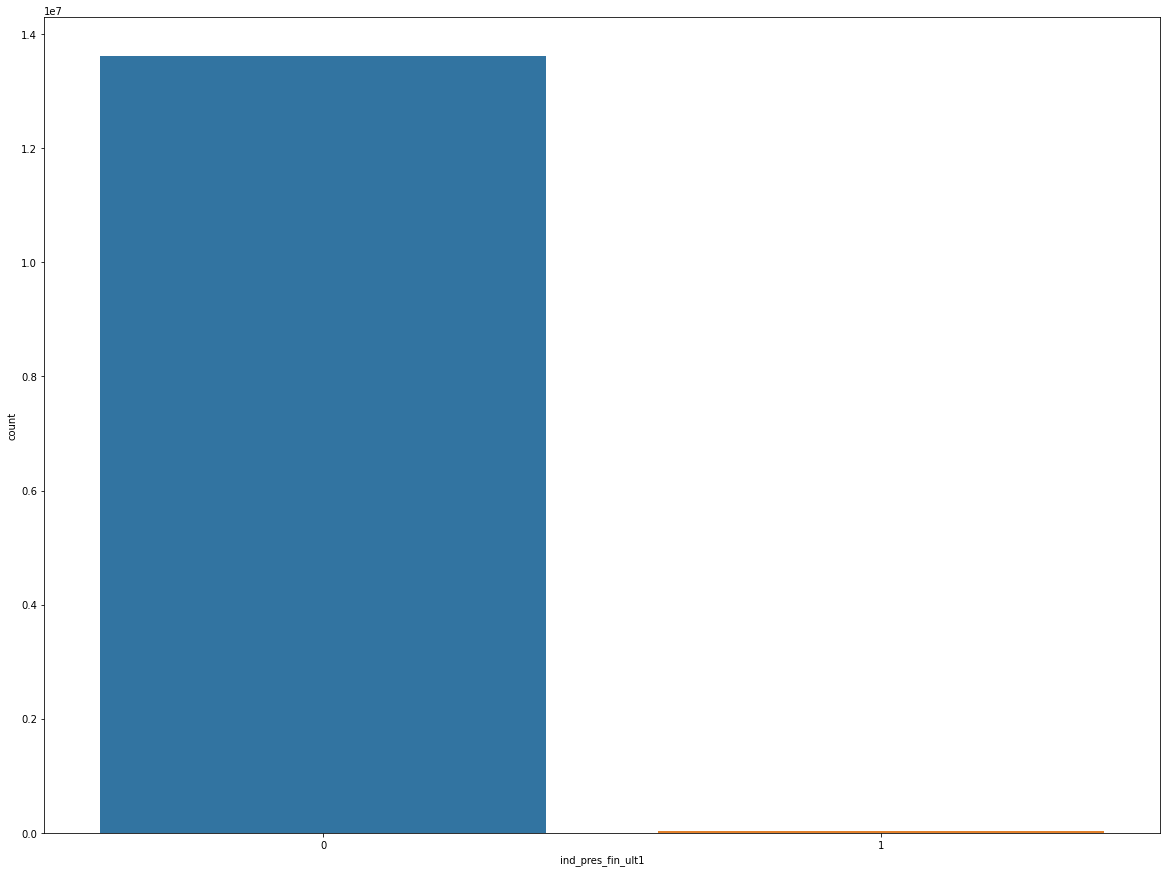

--------------------------------------------------
col :  ind_reca_fin_ult1


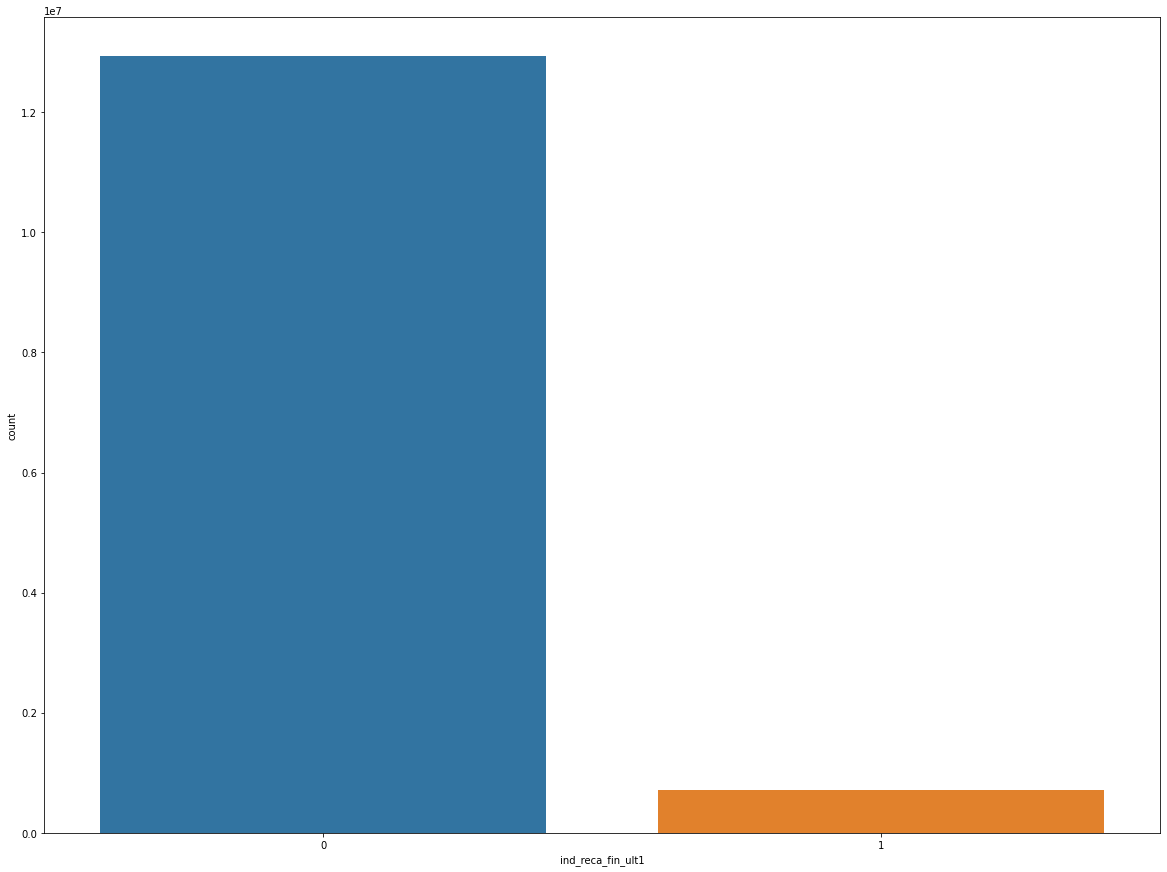

--------------------------------------------------
col :  ind_tjcr_fin_ult1


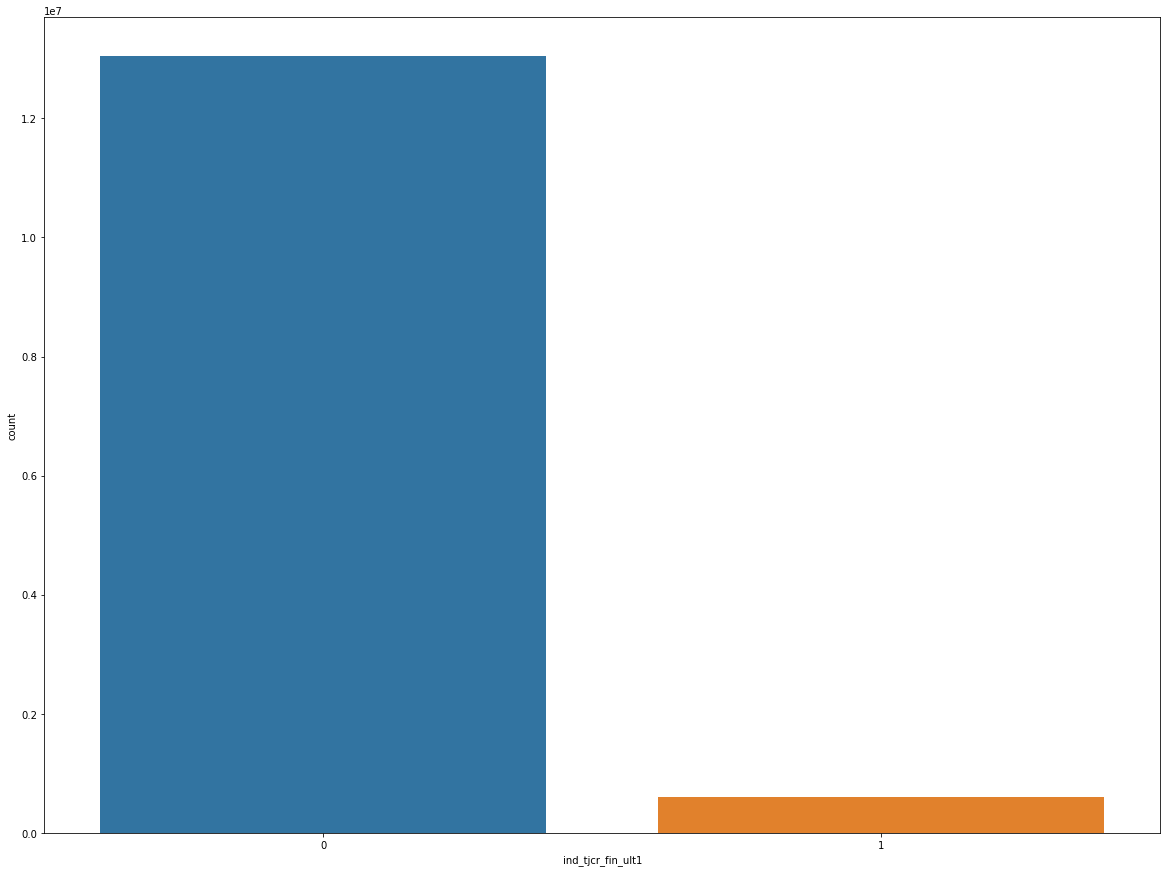

--------------------------------------------------
col :  ind_valo_fin_ult1


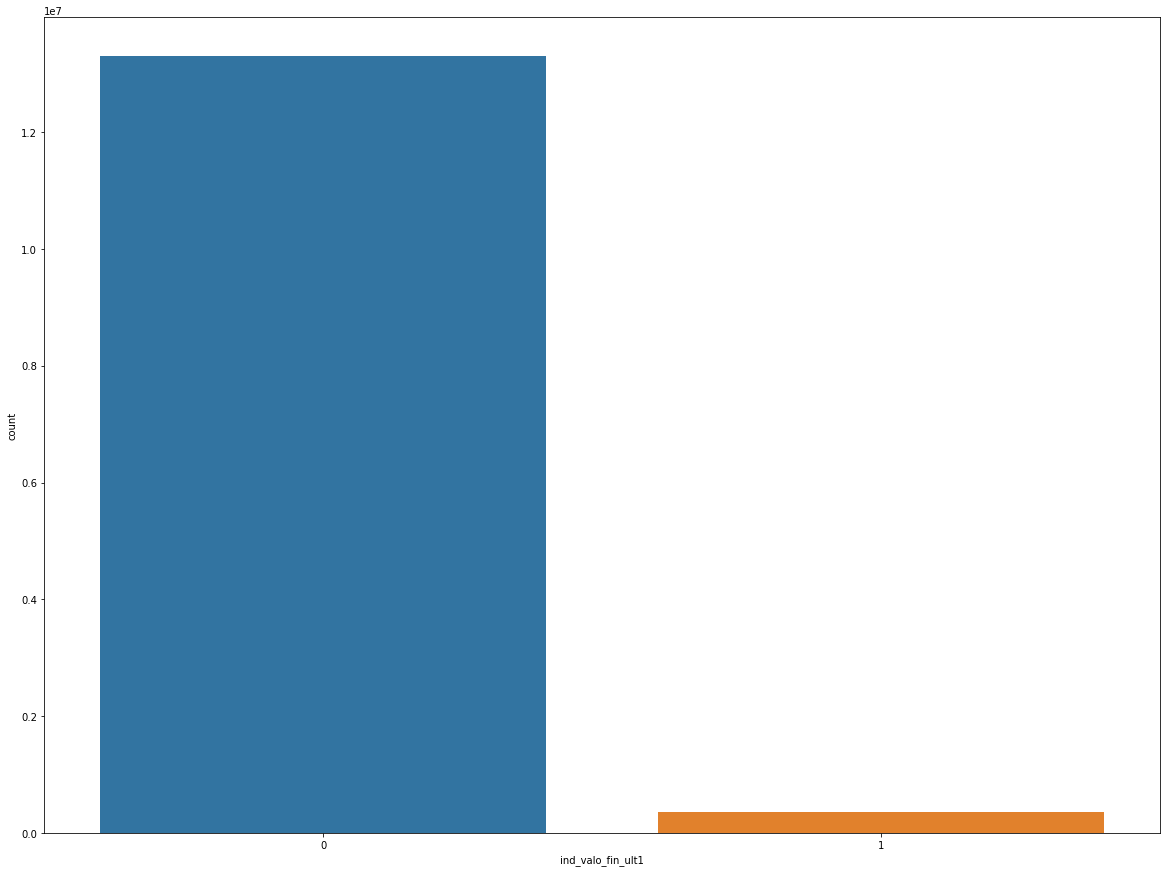

--------------------------------------------------
col :  ind_viv_fin_ult1


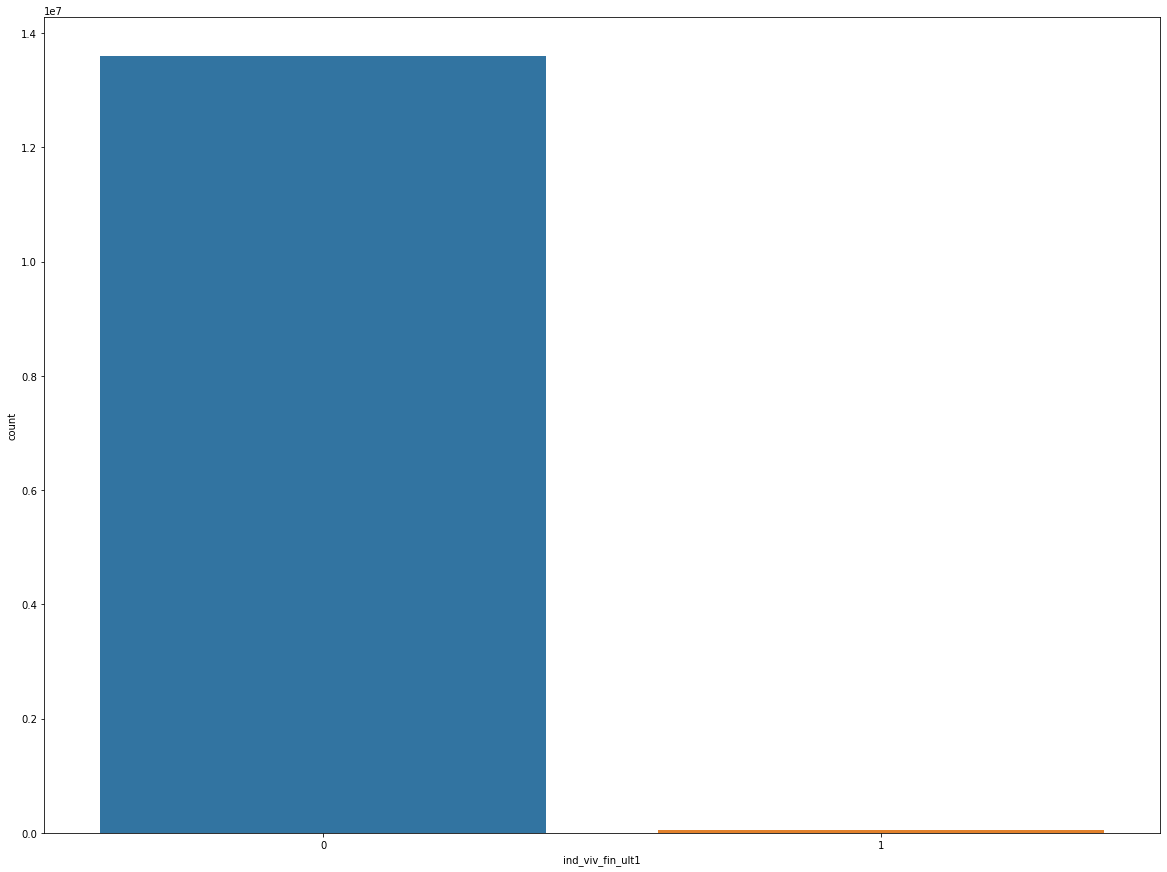

--------------------------------------------------
col :  ind_nomina_ult1


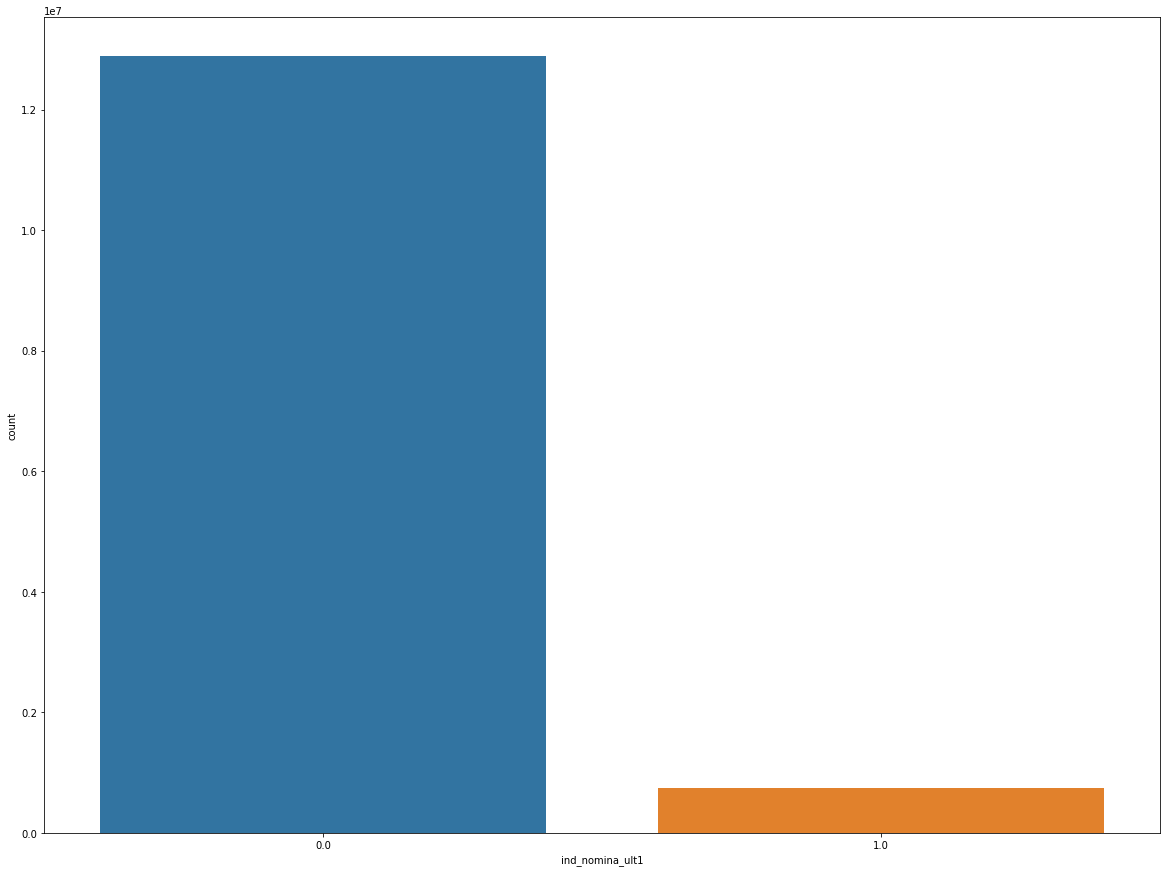

--------------------------------------------------
col :  ind_nom_pens_ult1


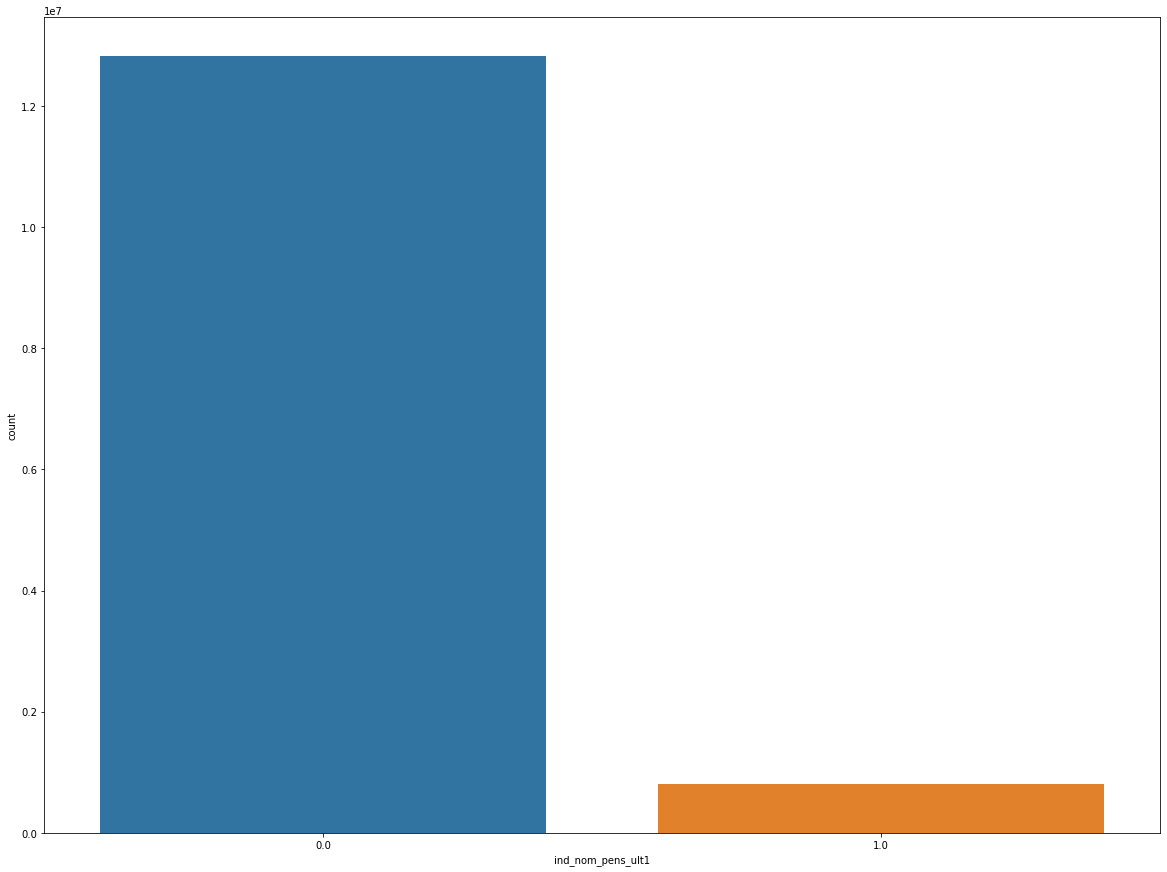

--------------------------------------------------
col :  ind_recibo_ult1


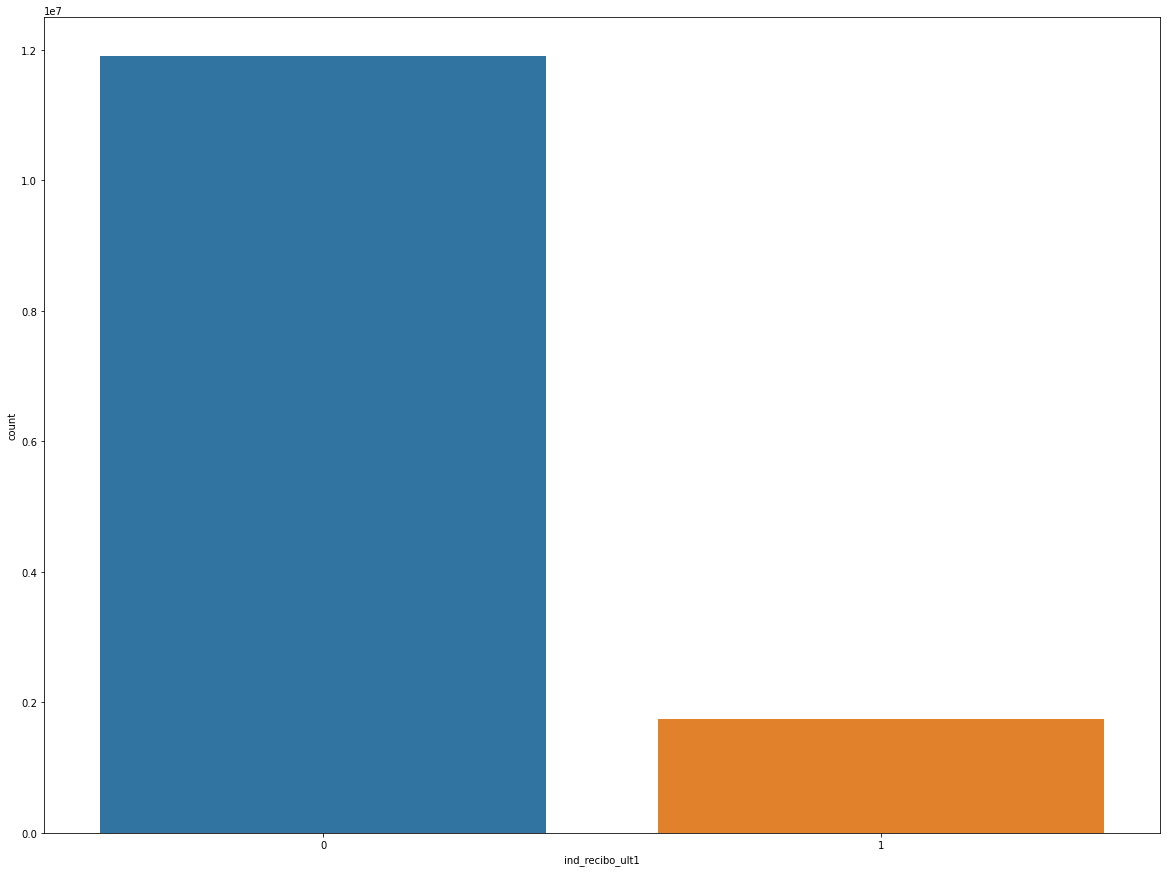

In [10]:
# 고객 고유 식별 번호인 'ncodpers'와 총 수입을 나타내는 'renta' 두 변수는 고유값이 너무 많아 시각화에 시간이 너무 소요 되므로 건너뛴다.

skip_cols = ['ncodpers', 'renta']
for col in trn.columns:
    # 출력에 너무 시간이 많이 걸리는 두 변수는 skip한다.
    if col in skip_cols:
        continue
        
    # 보기 편하게 영역 구분과 변수명을 출력한다.
    print('-' * 50)
    print('col : ', col)
    
    # 그래프 크기를(figsize) 설정한다.
    f, ax = plt.subplots(figsize=(20,15))
    #seabron을 사용한 막대 그래프를 생성한다. alpha는 투명도를 설정하는 값이다.
    sns.countplot(x=col, data=trn, alpha=1)
    #show()함수를 통해 시각화한다.
    plt.show()
    
    # indrel_1mes 그래프를 보면 "1.0, 1.0, 1" 세개의 동일한 값이 별도의 값인 것처럼 막대그래프에 나타난다. 데이터 타입의 통일이 필요하다.
    # age도 그래프 형성이 이상하게 되어있으므로 데이터 타입을 바꿔준다.

['2015-01-28', '2015-02-28', '2015-03-28', '2015-04-28', '2015-05-28', '2015-06-28', '2015-07-28', '2015-08-28', '2015-09-28', '2015-10-28', '2015-11-28', '2015-12-28', '2016-01-28', '2016-02-28', '2016-03-28', '2016-04-28', '2016-05-28']
['ind_ahor_fin_ult1', 'ind_aval_fin_ult1', 'ind_cco_fin_ult1', 'ind_cder_fin_ult1', 'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1', 'ind_ctop_fin_ult1', 'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1', 'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1', 'ind_fond_fin_ult1', 'ind_hip_fin_ult1', 'ind_plan_fin_ult1', 'ind_pres_fin_ult1', 'ind_reca_fin_ult1', 'ind_tjcr_fin_ult1', 'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1', 'ind_nom_pens_ult1', 'ind_recibo_ult1']


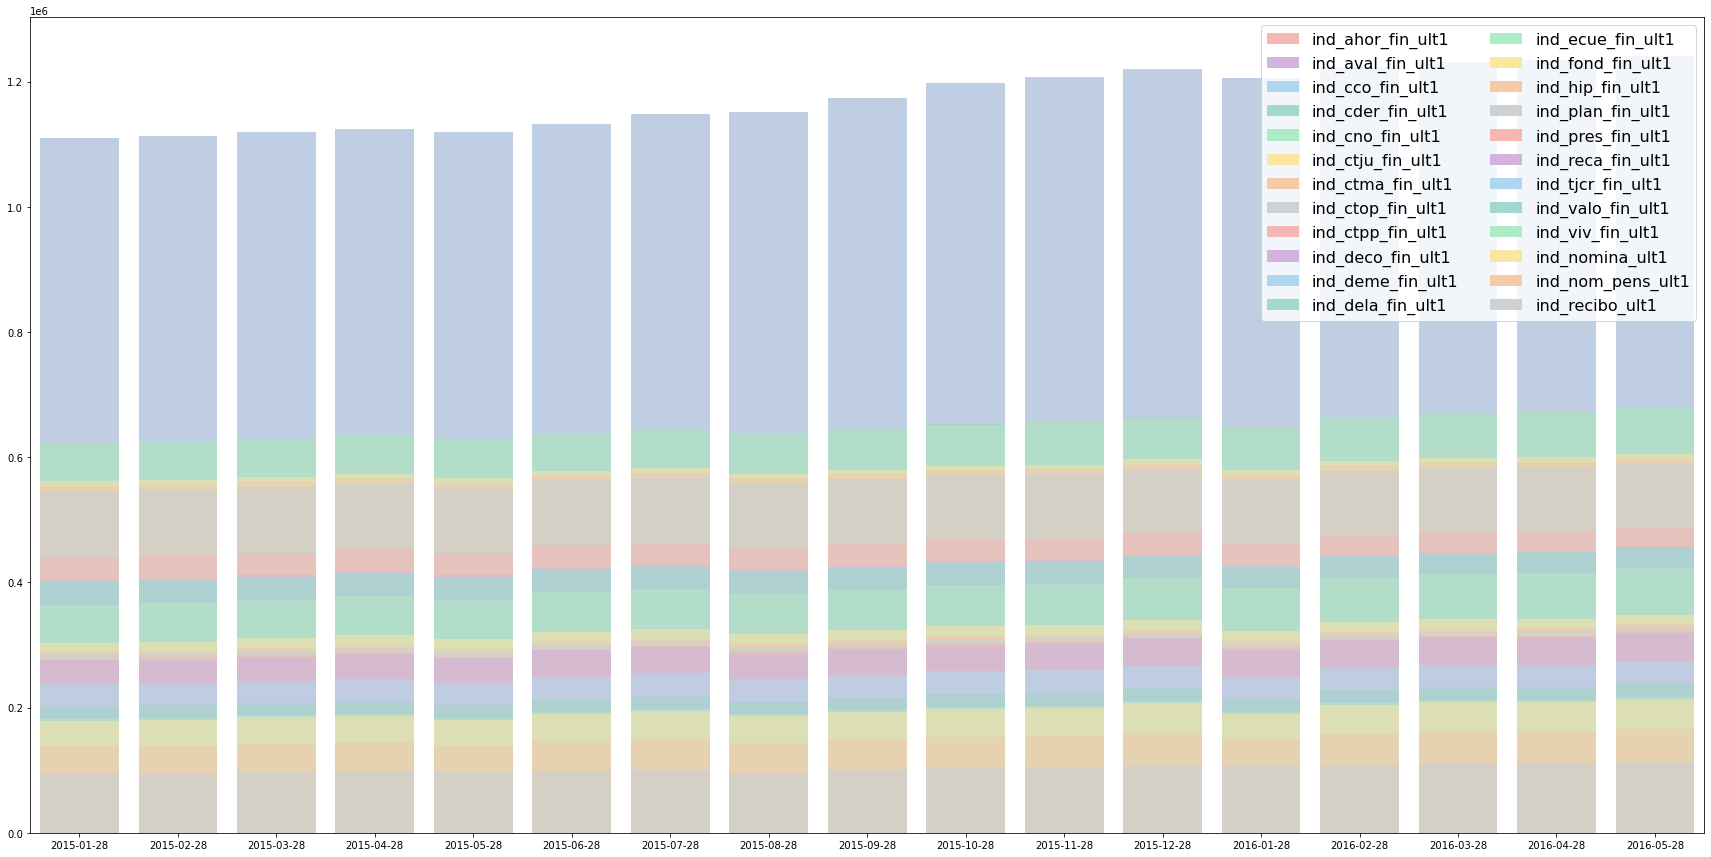

In [11]:
# 앞선 방식처럼 단순히 막대 그래프를 세우는 방법은 시계열 데이터를 제대로 분석하기 어렵다. 시간에 따른 변화 척도를 눈에 볼 수 있도록 해야한다.
# 예를 들어, 고객 유입 채널을 의미하는 canal_entrada 변수도 계절에 따라, 방학/입학 시즌에 따라 데이터 분포가 변할 수 있다.


# 이번에는 시계열성을 포함한 시각화 기법을 통하여 24개의 제품변수를 자세히 살펴본다.


# 날짜 데이터를 기준으로 분석하기 위하여, 날짜 데이터 별도로 추출한다.
# fecha_dato는 매달 28일로 되어있다.
months = trn['fecha_dato'].unique().tolist()
print(months)

# 제품 변수 24개를 추출한다.
label_cols = trn.columns[24:].tolist()
print(label_cols)

# 매월, 각 제품의 총합을 groupby(..).agg('sum')으로 계산하여, label_sum에 저장한다.
# label_over_time에는 매월 판매된 제품 한개의 합이 리스트 형태로 들어있다. 하지만 누적되는 형태가 아니므로 label_sum_over_time 리스트를 생성한다.
label_over_time=[]
for i in range(len(label_cols)):
    label_sum = trn.groupby(['fecha_dato'])[label_cols[i]].agg('sum')
    label_over_time.append(label_sum.tolist())
    
# 누적 막대 그래프를 시각화하기 위하여, n번째 제품의 총합을 1 ~ n번째 제품의 총합으로 만든다.
label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))     # 뒤에 .sum(axis=0) 함수를 쓰기 위해 np.asarray를 사용하였다.
    
# 시각화를 위하여 색깔을 지정한다.
color_list = ['#F5B7B1', '#D2B4DE', '#AED6F1', '#A2D9CE', '#ABEBC6', '#F9E79F', '#F5CBA7', '#CCD1D1']

# 그림 크기를 사전에 정의한다.
f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    # 24개의 제품에 대하여 Histogram을 그린다.
    # x축에는 월 데이터, y축에는 누적 총합, 색깔은 8개를 번갈아 가며 사용하며, 그림의 alpha값은 0.7로 지정한다.
    sns.barplot(x=months, y=label_sum_over_time[i], color=color_list[i%8], alpha=0.7)
    
# 우측 상단에 Legend를 추가한다.
plt.legend([plt.Rectangle((0,0), 1,1, fc=color_list[i%8], edgecolor='none') for i in range(len(label_cols))], label_cols,
          loc=1, ncol=2, prop={'size':16})

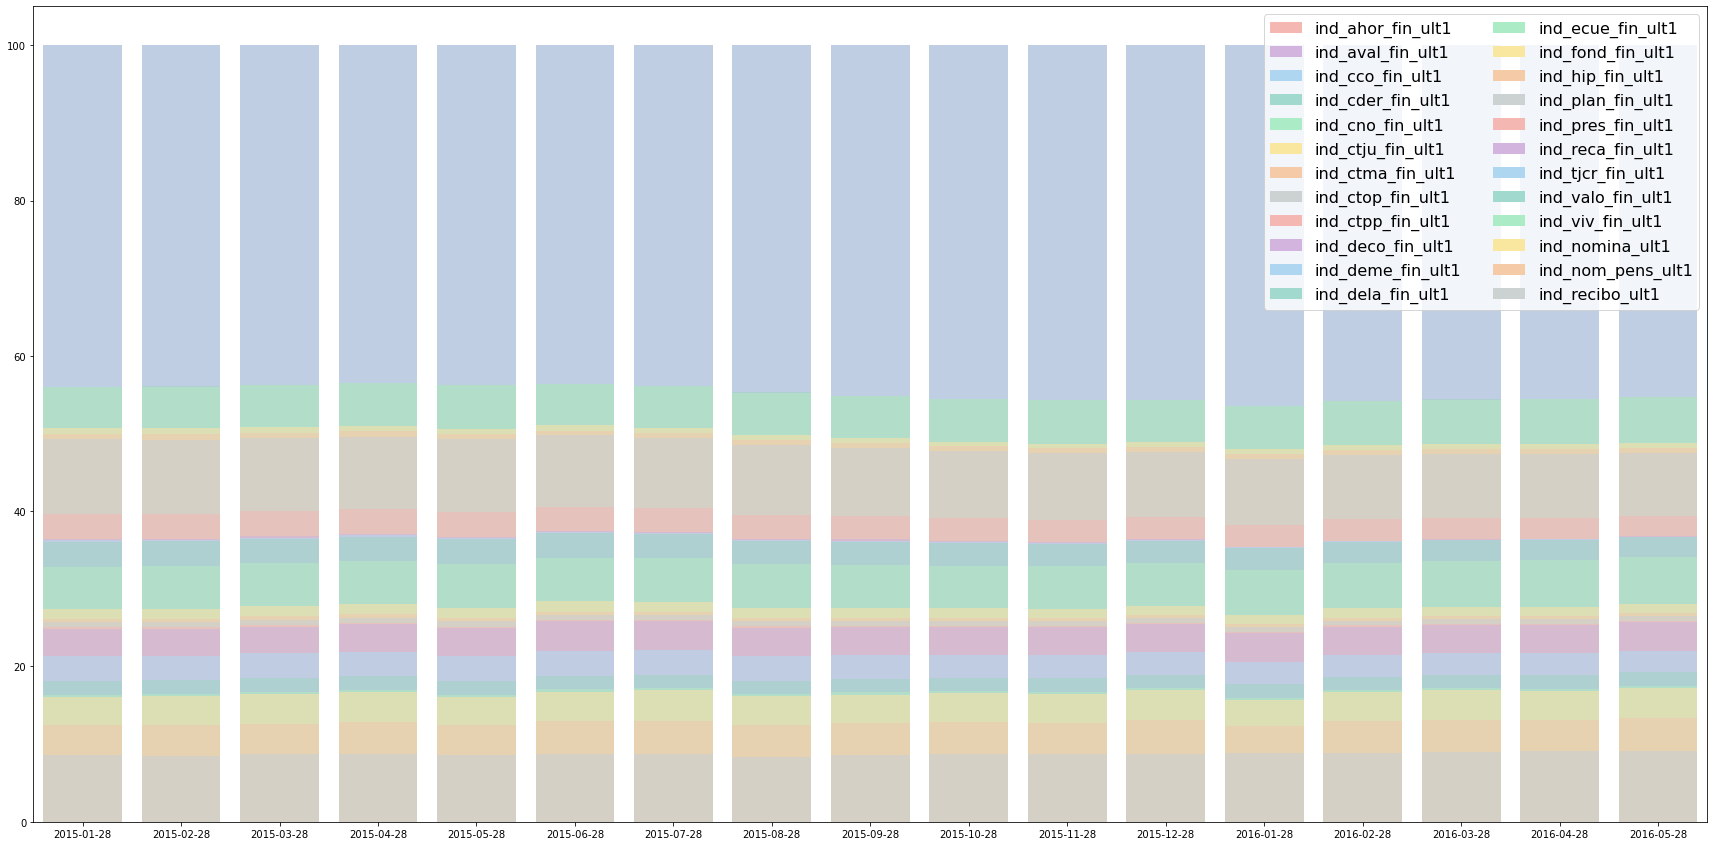

In [12]:
# label_sum_over_time의 값을 퍼센트 단위로 변환한다. 월마다 최댓값으로 나누고 100을 곱해준다.
# 월 최댓값 = np.asarray(label_sum_over_time).max(axis=0)

label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0)))*100

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color=color_list[i%8], alpha=0.7)
    
# 우측 상단에 Legend를 추가한다.
plt.legend([plt.Rectangle((0,0), 1,1, fc=color_list[i%8], edgecolor='none') for i in range(len(label_cols))], label_cols,
          loc=1, ncol=2, prop={'size':16})

In [13]:
'''
데이터 분석을 할 때, 무엇을 하는 건지 헤맬 때가 있다. 중요한 것은 예측해야 하는 변수에 초점을 맞추는 것이다.

예측을 위해 제공되는 변수(이번 경진 대회에서는 24개의 고객 변수에 해당한다)보다는 실제로 예측해야 하는 변수(24개의 금융 제품 변수)를
올바르게 분석하여 이해도를 높이는 것이 좋은 머신러닝 모델을 구축하는데 도움이 된다.

여기서 목표는
1. 데이터 기초 통계와 시각화를 통해 데이터를 직접 눈으로 보기
2. 변수 아이디어를 찾아내기
3. 예측 변수 24개에 대한 특징 찾아내기

앞선 누적 막대 그래프는 제품의 총 보유량을 나타내고 있을 뿐, 우리가 원하는 '신규 구매'에 대한 월별 추이를 나타내고 있지 않다.
'''

"\n데이터 분석을 할 때, 무엇을 하는 건지 헤맬 때가 있다. 중요한 것은 예측해야 하는 변수에 초점을 맞추는 것이다.\n\n예측을 위해 제공되는 변수(이번 경진 대회에서는 24개의 고객 변수에 해당한다)보다는 실제로 예측해야 하는 변수(24개의 금융 제품 변수)를\n올바르게 분석하여 이해도를 높이는 것이 좋은 머신러닝 모델을 구축하는데 도움이 된다.\n\n여기서 목표는\n1. 데이터 기초 통계와 시각화를 통해 데이터를 직접 눈으로 보기\n2. 변수 아이디어를 찾아내기\n3. 예측 변수 24개에 대한 특징 찾아내기\n\n앞선 누적 막대 그래프는 제품의 총 보유량을 나타내고 있을 뿐, 우리가 원하는 '신규 구매'에 대한 월별 추이를 나타내고 있지 않다.\n"

### 24개 금융 제품에 대한 '신규 구매' 데이터를 생성하기

In [2]:
# 제품 변수를 prods에 list형태로 저장한다.
prods = trn.columns[24:].tolist()

# 날짜를 숫자로 변환하는 함수이다. 2015-01-28은 1, 2016-06-28은 18로 변환된다
# strip('(string)'): 해당 문자열의 앞뒤로 특정 문자 삭제하기
# split('string'): 특정 문자를 기준으로 문자열을 분리하여 list(리스트)로 변환하기
# https://blog.naver.com/crm06217/221794906629
def date_to_int(str_date):
    Y, M, D = [int(a) for a in str_date.strip().split("-")]
    int_date = (int(Y) - 2015) * 12 + int(M)
    return int_date

# 날짜를 숫자로 변환하여 int_date에 저장한다
trn['int_date'] = trn['fecha_dato'].map(date_to_int).astype(np.int8)

trn.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1,int_date
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,1


In [3]:
# 데이터를 복사하고, int_date 날짜에 1을 더하여 lag를 생성한다. 변수명에 _prev를 추가한다. ex) ind_recibo_ult1 + _prev
trn_lag = trn.copy()
trn_lag['int_date'] += 1
trn_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in trn.columns]

trn_lag.head()

,fecha_dato_prev,ncodpers,ind_empleado_prev,pais_residencia_prev,sexo_prev,age_prev,fecha_alta_prev,ind_nuevo_prev,antiguedad_prev,indrel_prev,...,ind_plan_fin_ult1_prev,ind_pres_fin_ult1_prev,ind_reca_fin_ult1_prev,ind_tjcr_fin_ult1_prev,ind_valo_fin_ult1_prev,ind_viv_fin_ult1_prev,ind_nomina_ult1_prev,ind_nom_pens_ult1_prev,ind_recibo_ult1_prev,int_date
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0.0,0.0,0,2
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,2
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,2
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,2
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0.0,0.0,0,2


In [4]:
# 원본 데이터와 lag 데이터를 ncodper와 int_date 기준으로 합친다. Lag 데이터의 int_date는 1 밀려있기 때문에, 저번달의 제품 정보가 삽입된다.
df_trn = trn.merge(trn_lag, on=['ncodpers','int_date'], how='left')

df_trn.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1_prev,ind_plan_fin_ult1_prev,ind_pres_fin_ult1_prev,ind_reca_fin_ult1_prev,ind_tjcr_fin_ult1_prev,ind_valo_fin_ult1_prev,ind_viv_fin_ult1_prev,ind_nomina_ult1_prev,ind_nom_pens_ult1_prev,ind_recibo_ult1_prev
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# 메모리 효율을 위해 불필요한 변수를 메모리에서 제거한다
del trn, trn_lag

# 저번달의 제품 정보가 존재하지 않을 경우를 대비하여 0으로 대체한다.
for prod in prods:
    prev = prod + '_prev'
    df_trn[prev].fillna(0, inplace=True)
    
df_trn.head()

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1_prev,ind_plan_fin_ult1_prev,ind_pres_fin_ult1_prev,ind_reca_fin_ult1_prev,ind_tjcr_fin_ult1_prev,ind_valo_fin_ult1_prev,ind_viv_fin_ult1_prev,ind_nomina_ult1_prev,ind_nom_pens_ult1_prev,ind_recibo_ult1_prev
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# 원본 데이터에서의 제품 보유 여부 – lag데이터에서의 제품 보유 여부를 비교하여 신규 구매 변수 padd를 구한다
for prod in prods:
    padd = prod + '_add'
    prev = prod + '_prev'
    df_trn[padd] = ((df_trn[prod] == 1) & (df_trn[prev] == 0)).astype(np.int8)

# 신규 구매 변수만을 추출하여 labels에 저장한다.
add_cols = [prod + '_add' for prod in prods]
labels = df_trn[add_cols].copy()
labels.columns = prods
labels.to_csv('./input/labels.csv', index=False)

In [2]:
# labels.csv 생성시 코드를 나눠서 치면 커널이 꺼지는 에러가 발생해서 전체 코드로 입력

'''
# 제품 변수를 prods에 list형태로 저장한다
prods = trn.columns[24:].tolist()

# 날짜를 숫자로 변환하는 함수이다. 2015-01-28은 1, 2016-06-28은 18로 변환된다
def date_to_int(str_date):
    Y, M, D = [int(a) for a in str_date.strip().split("-")]
    int_date = (int(Y) - 2015) * 12 + int(M)
    return int_date

# 날짜를 숫자로 변환하여 int_date에 저장한다
trn['int_date'] = trn['fecha_dato'].map(date_to_int).astype(np.int8)

# 데이터를 복사하고, int_date 날짜에 1을 더하여 lag를 생성한다. 변수명에 _prev를 추가한다.
trn_lag = trn.copy()
trn_lag['int_date'] += 1
trn_lag.columns = [col + '_prev' if col not in ['ncodpers', 'int_date'] else col for col in trn.columns]

# 원본 데이터와 lag 데이터를 ncodper와 int_date 기준으로 합친다. Lag 데이터의 int_date는 1 밀려있기 때문에, 저번달의 제품 정보가 삽입된다.
df_trn = trn.merge(trn_lag, on=['ncodpers','int_date'], how='left')

# 메모리 효율을 위해 불필요한 변수를 메모리에서 제거한다
del trn, trn_lag

# 저번달의 제품 정보가 존재하지 않을 경우를 대비하여 0으로 대체한다.
for prod in prods:
    prev = prod + '_prev'
    df_trn[prev].fillna(0, inplace=True)

# 원본 데이터에서의 제품 보유 여부 – lag데이터에서의 제품 보유 여부를 비교하여 신규 구매 변수 padd를 구한다
for prod in prods:
    padd = prod + '_add'
    prev = prod + '_prev'
    df_trn[padd] = ((df_trn[prod] == 1) & (df_trn[prev] == 0)).astype(np.int8)

# 신규 구매 변수만을 추출하여 labels에 저장한다.
add_cols = [prod + '_add' for prod in prods]
labels = df_trn[add_cols].copy()
labels.columns = prods
labels.to_csv('./input/labels.csv', index=False)
'''

### 생성한 신규데이터로 시각화 plot 생성

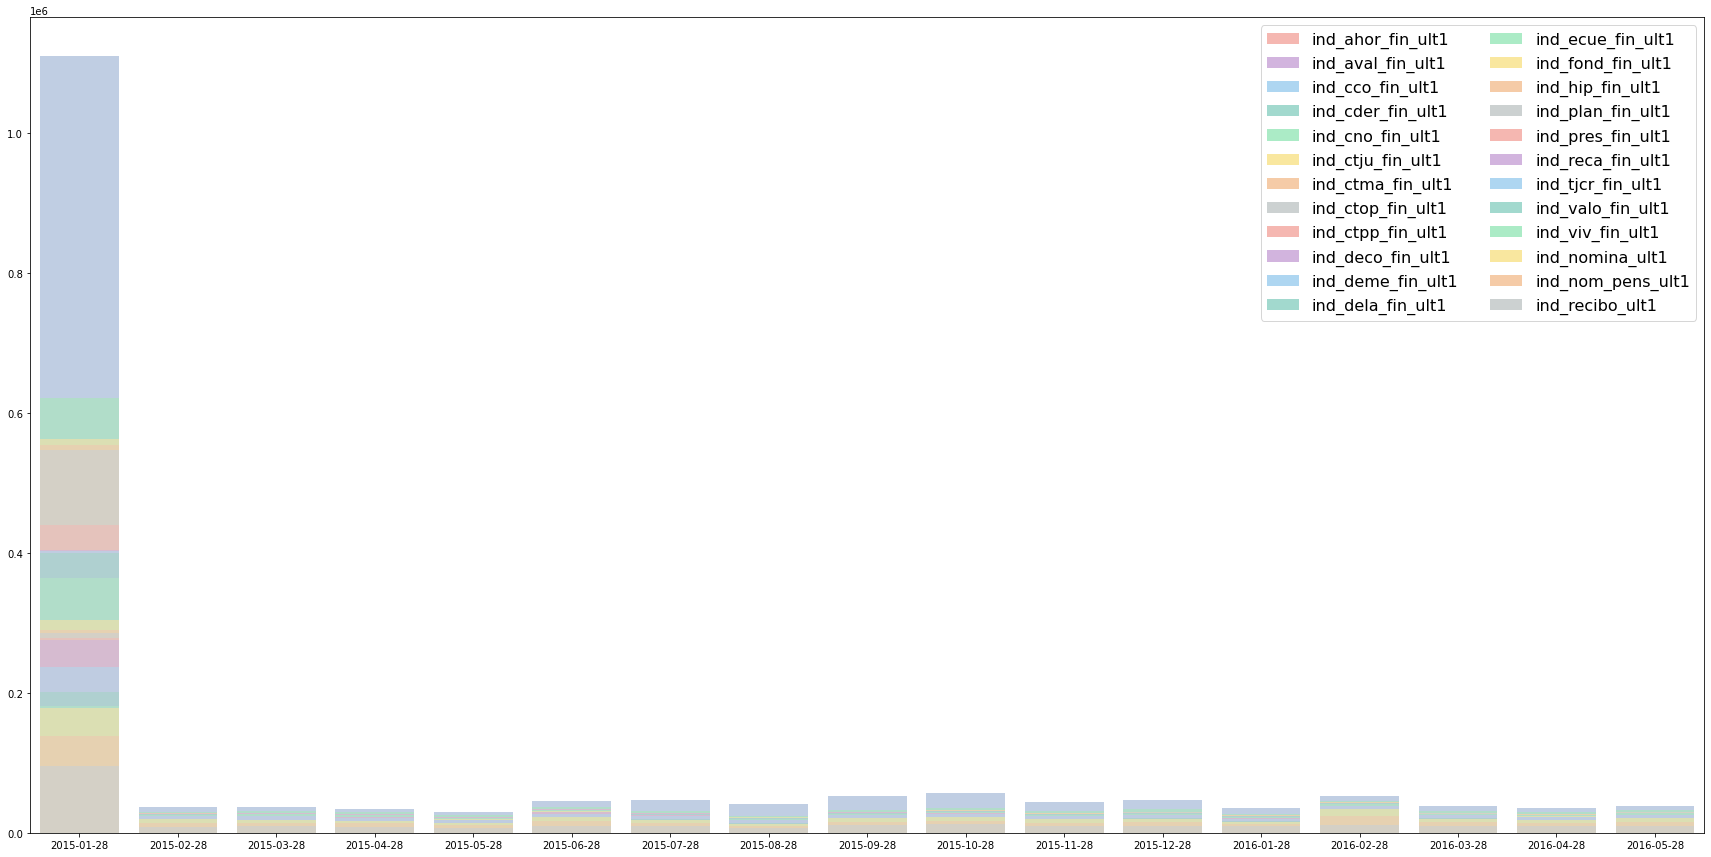

In [6]:
labels = pd.read_csv('./input/labels.csv').astype(int)
fecha_dato = pd.read_csv('./input/train_ver2.csv', usecols=['fecha_dato'])

labels['date'] = fecha_dato.fecha_dato
# print(labels['date'])  # 2015-01-28, 2015-02-28 ...

months = np.unique(fecha_dato.fecha_dato).tolist()
label_cols = labels.columns.tolist()[:24]

label_over_time = []
for i in range(len(label_cols)):
    label_over_time.append(labels.groupby(['date'])[label_cols[i]].agg('sum').tolist())
    
label_sum_over_time = []
for i in range(len(label_cols)):
    label_sum_over_time.append(np.asarray(label_over_time[i:]).sum(axis=0))

color_list = ['#F5B7B1', '#D2B4DE', '#AED6F1', '#A2D9CE', '#ABEBC6', '#F9E79F', '#F5CBA7', '#CCD1D1']

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_over_time[i], color=color_list[i%8], alpha=0.7)

plt.legend([plt.Rectangle((0,0), 1, 1, fc=color_list[i%8], edgecolor='none') for i in range(len(label_cols))], label_cols, loc=1, ncol=2, prop={'size':16})

In [7]:
gc.collect()

22

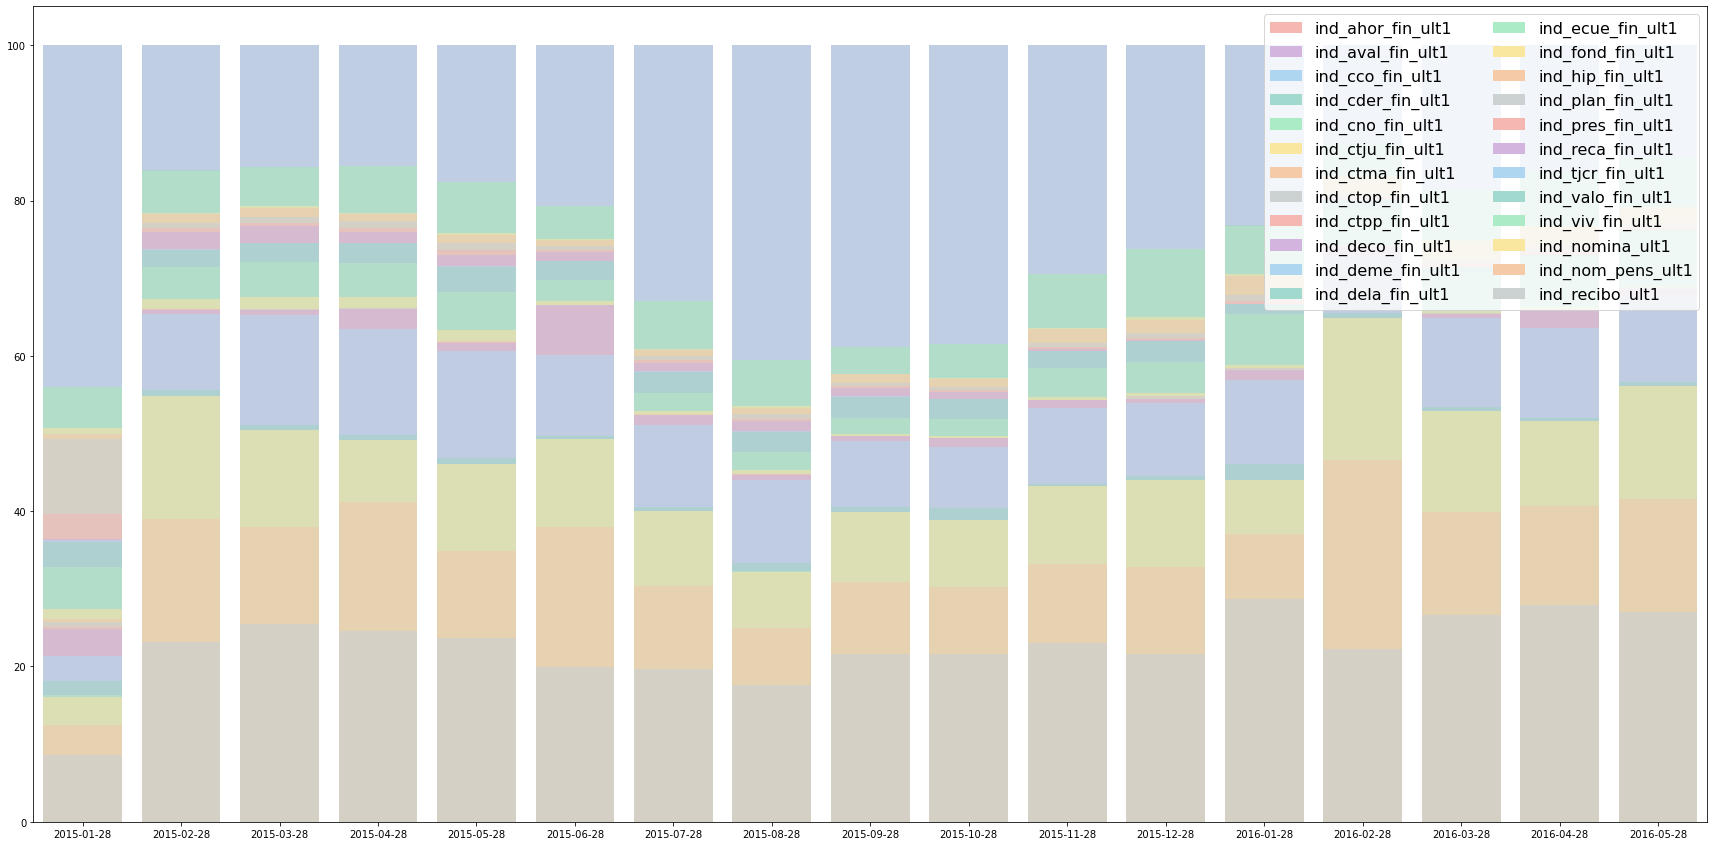

In [8]:
label_sum_percent = (label_sum_over_time / (1.*np.asarray(label_sum_over_time).max(axis=0)))*100

f, ax = plt.subplots(figsize=(30, 15))
for i in range(len(label_cols)):
    sns.barplot(x=months, y=label_sum_percent[i], color=color_list[i%8], alpha=0.7)
    
# 우측 상단에 Legend를 추가한다.
plt.legend([plt.Rectangle((0,0), 1,1, fc=color_list[i%8], edgecolor='none') for i in range(len(label_cols))], label_cols,
          loc=1, ncol=2, prop={'size':16})